## Introduction

In this data analysis project, we're going to conduct a very comprehensive case study on cybersecurity risks, specifically focusing on the vulnerabilities reported in the year 2022. By analyzing a comprehensive dataset obtained from the Cybersecurity and Infrastructure Security Agency (CISA), we aim to gain insights into the nature of these vulnerabilities, the affected products, and their potential impact on the security landscape.

Cybersecurity threats have become increasingly sophisticated and prevalent in recent years. Organizations and individuals alike face the constant challenge of safeguarding their systems and data from malicious actors. Understanding the vulnerabilities that exist is crucial for developing effective defense strategies and mitigating potential risks.

Our dataset consists of detailed information about various vulnerabilities, including the Common Vulnerabilities and Exposures (CVE) IDs, vendor and product details, vulnerability names, dates of discovery, severity ratings, and recommended actions. By analyzing this data, we can uncover patterns, trends, and key insights that shed light on the evolving cybersecurity landscape in 2022.

Throughout this analysis, we will employ the powerful data analysis and visualization capabilities of the R programming language. By applying various techniques and methodologies, ranging from Network, Clustering and Bayesian Analysis.

### Data Prep

In [ ]:
library(tidyverse)

Let's combine each dataset into a single dataframe called all_df.

* df0608: Data from June 8, 2022.
* df0609: Data from June 9, 2022.
* df0627: Data from June 27, 2022.
* df0704: Data from July 4, 2022.
* df1209: Data from December 9, 2022.

In [ ]:
df1209 <- read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-12-09-enriched.csv")
df0704 <- read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-07-04-enriched.csv")
df0627 <- read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-06-27-enriched.csv")
df0609 <- read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-06-09-enriched.csv")
df0608 <- read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-06-08-enriched.csv")

all_df <- rbind(df0608, df0609, df0627, df0704, df1209)

In [4]:
head(all_df)

cve_id         vendor_project product           
1 CVE-2021-27104 accellion      FTA               
2 CVE-2021-27102 accellion      FTA               
3 CVE-2021-27101 accellion      FTA               
4 CVE-2021-27103 accellion      FTA               
5 CVE-2021-21017 adobe          Acrobat and Reader
6 CVE-2021-28550 adobe          Acrobat and Reader
  vulnerability_name                                                date_added
1 Accellion FTA OS Command Injection Vulnerability                  2021-11-03
2 Accellion FTA OS Command Injection Vulnerability                  2021-11-03
3 Accellion FTA SQL Injection Vulnerability                         2021-11-03
4 Accellion FTA SSRF Vulnerability                                  2021-11-03
5 Adobe Acrobat and Reader Heap-based Buffer Overflow Vulnerability 2021-11-03
6 Adobe Acrobat and Reader Use-After-Free Vulnerability             2021-11-03
  short_description                                                                                                                                                                                                                                                                                                                                                                                                                  
1 Accellion FTA 9_12_370 and earlier is affected by OS command execution via a crafted POST request to various admin endpoints.                                                                                                                                                                                                                                                                                                      
2 Accellion FTA 9_12_411 and earlier is affected by OS command execution via a local web service call.                                                                                                                                                                                                                                                                                                                               
3 Accellion FTA 9_12_370 and earlier is affected by SQL injection via a crafted Host header in a request to document_root.html.                                                                                                                                                                                                                                                                                                      
4 Accellion FTA 9_12_411 and earlier is affected by SSRF via a crafted POST request to wmProgressstat.html.                                                                                                                                                                                                                                                                                                                          
5 Acrobat Reader DC versions versions 2020.013.20074 (and earlier), 2020.001.30018 (and earlier) and 2017.011.30188 (and earlier) are affected by a heap-based buffer overflow vulnerability. An unauthenticated attacker could leverage this vulnerability to achieve arbitrary code execution in the context of the current user. Exploitation of this issue requires user interaction in that a victim must open a malicious file.
6 Acrobat Reader DC versions versions 2021.001.20150 (and earlier), 2020.001.30020 (and earlier) and 2017.011.30194 (and earlier) are affected by a Use After Free vulnerability. An unauthenticated attacker could leverage this vulnerability to achieve arbitrary code execution in the context of the current user. Exploitation of this issue requires user interaction in that a victim must open a malicious file.            
  required_action                        due_date   notes grp pub_date   cvss
1 Apply updates per vendor instructions. 2021-11-17 NA    1 

In [5]:
dim(all_df)

[1] 3984   16

In [6]:
summary(all_df)

    cve_id          vendor_project       product          vulnerability_name
 Length:3984        Length:3984        Length:3984        Length:3984       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   date_added         short_description  required_action   
 Min.   :2021-11-03   Length:3984        Length:3984       
 1st Qu.:2021-11-03   Class :character   Class :character  
 Median :2022-03-03   Mode  :character   Mode  :character  
 Mean   :2022-02-05                                        
 3rd Qu.:2022-03-28                                        
 Max.   :2022-12-05     

#### Information on the data frame

Data frame consists of 3984 columns and 16 rows.

* **cve_id**: This column represents the unique identifier for each vulnerability entry. It is stored as character data.

* **vendor_project**: This column contains the name or identifier of the vendor or project associated with the vulnerability. It is stored as character data.

* **product**: This column denotes the specific product or software that is affected by the vulnerability. It is stored as character data.

* **vulnerability_name**: This column provides the name or description of the vulnerability itself. It is stored as character data.

* **date_added**: This column represents the date when the vulnerability was added or discovered. It is stored as a date data type.

* **short_description**: This column contains a brief summary or description of the vulnerability. It is stored as character data.

* **required_action**: This column specifies the recommended action or steps to be taken to address the vulnerability. It is stored as character data.

* **due_date**: This column denotes the deadline or due date for taking action to mitigate the vulnerability. It is stored as a date data type.

* **notes**: This column indicates whether there are any additional notes or comments associated with the vulnerability. It is stored as logical data (TRUE/FALSE).

* **grp**: This column represents a grouping or categorization of vulnerabilities. It is stored as a numeric (double) data type.

* **pub_date**: This column denotes the date when the vulnerability was publicly disclosed or made known. It is stored as a date data type.

* **cvss**: This column contains the Common Vulnerability Scoring System (CVSS) score, which provides a standardized measure of vulnerability severity. It is stored as a numeric (double) data type.

* **cwe**: This column represents the Common Weakness Enumeration (CWE) ID associated with the vulnerability. It is stored as character data.

* **vector**: This column describes the vector or method of exploitation for the vulnerability. It is stored as character data.

* **complexity**: This column indicates the complexity level of exploiting the vulnerability. It is stored as character data.

* **severity**: This column represents the severity level assigned to the vulnerability. It is stored as character data.

In [7]:
# CHeck the number of NA values for each column
sapply(all_df, function(x) sum(is.na(x)))

cve_id     vendor_project            product vulnerability_name 
                 0                  0                  5                  0 
        date_added  short_description    required_action           due_date 
                 0                 30                  0                  0 
             notes                grp           pub_date               cvss 
              3907                  0                878               1500 
               cwe             vector         complexity           severity 
               894               1500               1500               1500

In [8]:
# Remove "notes" column as it contains unuseful info and a lot of NA values
all_df <- subset(all_df, select = -c(notes))

sapply(all_df, function(x) sum(is.na(x)))

cve_id     vendor_project            product vulnerability_name 
                 0                  0                  5                  0 
        date_added  short_description    required_action           due_date 
                 0                 30                  0                  0 
               grp           pub_date               cvss                cwe 
                 0                878               1500                894 
            vector         complexity           severity 
              1500               1500               1500

In [9]:
str(all_df)

tibble [3,984 × 15] (S3: tbl_df/tbl/data.frame)
 $ cve_id            : chr [1:3984] "CVE-2021-27104" "CVE-2021-27102" "CVE-2021-27101" "CVE-2021-27103" ...
 $ vendor_project    : chr [1:3984] "accellion" "accellion" "accellion" "accellion" ...
 $ product           : chr [1:3984] "FTA" "FTA" "FTA" "FTA" ...
 $ vulnerability_name: chr [1:3984] "Accellion FTA OS Command Injection Vulnerability" "Accellion FTA OS Command Injection Vulnerability" "Accellion FTA SQL Injection Vulnerability" "Accellion FTA SSRF Vulnerability" ...
 $ date_added        : Date[1:3984], format: "2021-11-03" "2021-11-03" ...
 $ short_description : chr [1:3984] "Accellion FTA 9_12_370 and earlier is affected by OS command execution via a crafted POST request to various admin endpoints." "Accellion FTA 9_12_411 and earlier is affected by OS command execution via a local web service call." "Accellion FTA 9_12_370 and earlier is affected by SQL injection via a crafted Host header in a request to document_root.html." "

#### Imputation

After looking at the data frame throughly, i suspect that columns who share the same cve_id have identical values.

In [10]:
# Group the data by cve_id and count the number of unique values in each column
grouped_df <- all_df %>%
  group_by(cve_id) %>%
  summarize_all(n_distinct)

# Check if all columns have the same number of unique values for each cve_id
identical(grouped_df[-1], colSums(!is.na(grouped_df[-1]))[1])

[1] FALSE

In [11]:
# Check which columns have different numbers of unique values
which(!identical(grouped_df[-1], colSums(!is.na(grouped_df[-1]))[1]))

[1] 1

Only first column has differetn values, which has the column names.

In [12]:
sapply(all_df, function(x) sum(is.na(x)))

cve_id     vendor_project            product vulnerability_name 
                 0                  0                  5                  0 
        date_added  short_description    required_action           due_date 
                 0                 30                  0                  0 
               grp           pub_date               cvss                cwe 
                 0                878               1500                894 
            vector         complexity           severity 
              1500               1500               1500

In [13]:
# Impute missing values in all columns
all_imp <- all_df %>%
  group_by(cve_id) %>%
  mutate(across(everything(), ~if_else(is.na(.), first(.[!is.na(.)]), .)))

In [14]:
sapply(all_imp, function(x) sum(is.na(x)))

cve_id     vendor_project            product vulnerability_name 
                 0                  0                  5                  0 
        date_added  short_description    required_action           due_date 
                 0                 30                  0                  0 
               grp           pub_date               cvss                cwe 
                 0                 98                863                103 
            vector         complexity           severity 
               863                863                863

By grouping the data by cve_id and counting the number of unique values in each column, we ensure that each vulnerability is represented by a single record and avoid duplication of information. The check for equal numbers of unique values confirms the consistency of the dataset, ensuring that no discrepancies exist within the columns for each vulnerability.

After imputing missing values in the all_df dataframe, the resulting all_imp dataframe contains the same structure as the original dataset but with imputed values.

We'll look at correlations for more imputation opportunities.

In [15]:
# create a copy of the original data frame for the new numeric one
all_num_omitted <- all_imp

# encode categorical variables using label encoding
all_num_omitted$product <- as.numeric(as.factor(all_df$product))
all_num_omitted$vulnerability_name <- as.numeric(as.factor(all_df$vulnerability_name))
all_num_omitted$short_description <- as.numeric(as.factor(all_df$short_description))
all_num_omitted$required_action <- as.numeric(as.factor(all_df$required_action))
all_num_omitted$cwe <- as.numeric(as.factor(all_df$cwe))
all_num_omitted$vector <- as.numeric(as.factor(all_df$vector))
all_num_omitted$complexity <- as.numeric(as.factor(all_df$complexity))
all_num_omitted$severity <- as.numeric(as.factor(all_df$severity))
all_num_omitted$vendor_project <- as.numeric(as.factor(all_df$vendor_project))
all_num_omitted$cve_id <- as.numeric(as.factor(all_df$cve_id))
all_num_omitted$date_added <- as.numeric(as.factor(all_df$date_added))
all_num_omitted$due_date <- as.numeric(as.factor(all_df$due_date))
all_num_omitted$pub_date <- as.numeric(as.factor(all_df$pub_date))

all_num_omitted <- na.omit(all_num_omitted)

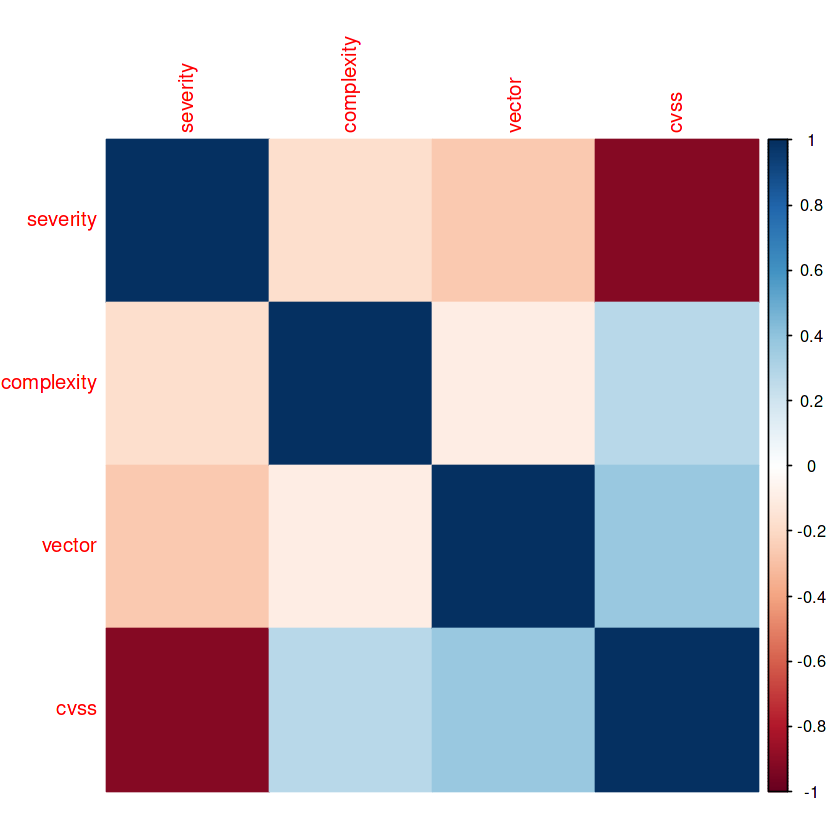

In [47]:
library(corrplot)

# Select the relevant columns for correlation analysis
columns_of_interest <- c("severity", "complexity", "vector", "cvss")

# Subset the dataframe with the selected columns
subset_df <- all_num_omitted[, columns_of_interest]

correlation_matrix <- cor(subset_df)

corrplot(correlation_matrix, method = "color")

cvss and severity has a strong negative correlation.

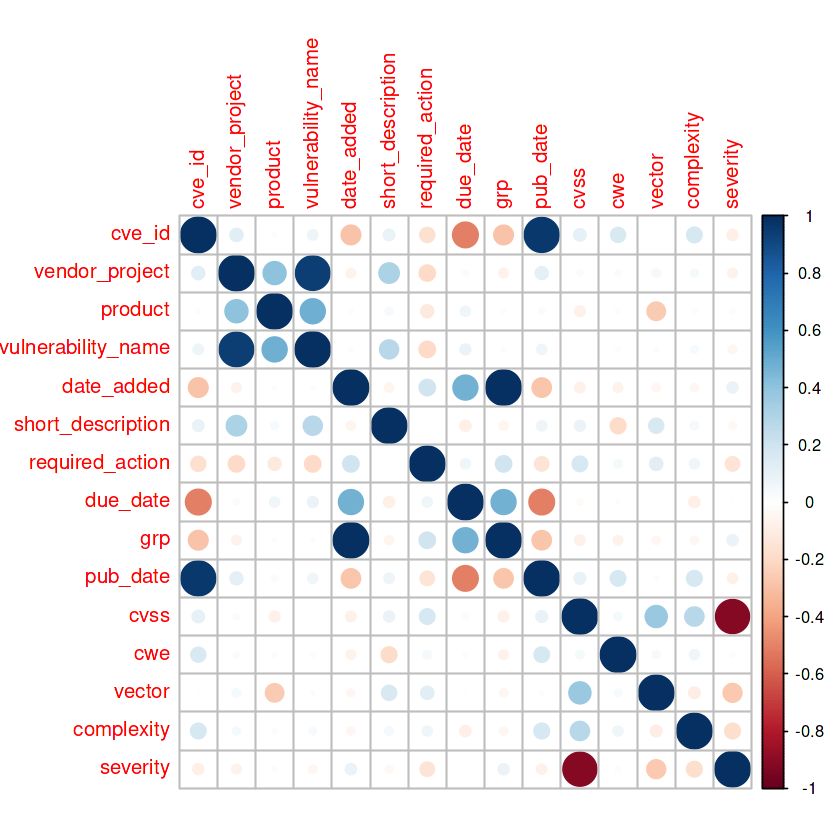

In [17]:
correlation_matrix_all <- cor(all_num_omitted)

corrplot(correlation_matrix_all)

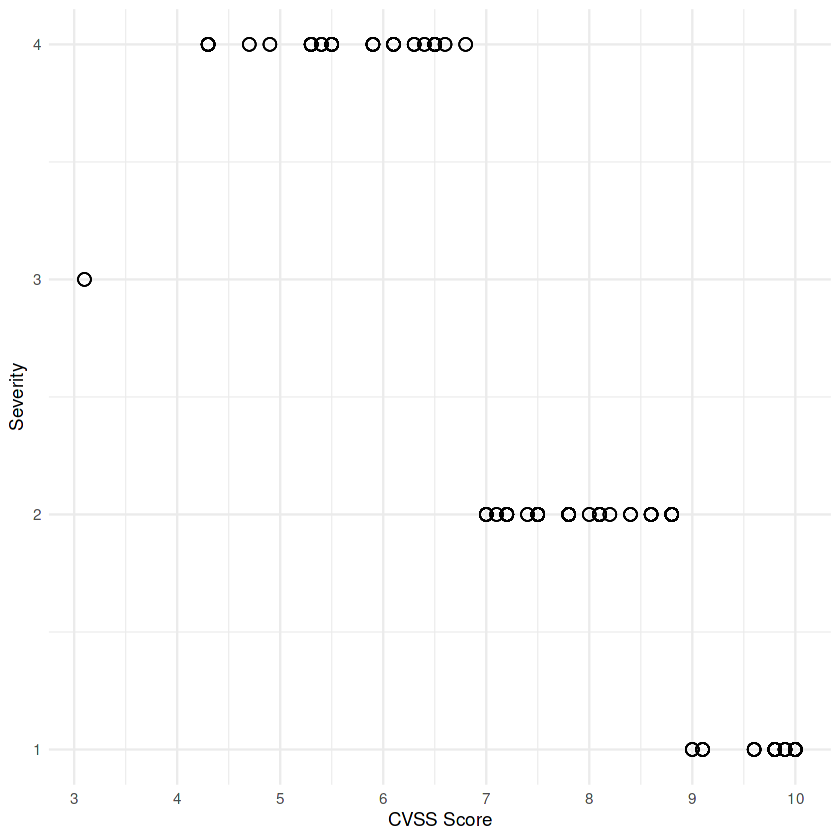

In [48]:
ggplot(all_num_omitted, aes(x = cvss, y = severity)) +
  geom_point(shape = 1, size = 3, color = "black") +
  labs(x = "CVSS Score", y = "Severity") +
  scale_x_continuous(breaks = seq(0, 10, 1)) +
  theme_minimal()

Identifying new imputation opportunities

Numerical notations of severity levels: CRITICAL = 1, HIGH = 2, LOW = 3, MEDIUM 4

* Severity: x < 4 = LOW, 4 <= x < 7 = MEDIUM, 7 <= x < 9 = HIGH, x > 9 = CRITICAL
* pub_date = cve_id (pub_date is the same for cells who share the same cve_id)
* fuel cms = fuel cms (5 columns have vendor_project named "fuel cms" doesn't have a product name, so i decided to name them fuel cms as i don't want to omit the variables because of the missing product name)

In [49]:
# Impute product and short description columns
all_imp$product[is.na(all_imp$product)] <- "fuel cms"
all_imp$short_description[is.na(all_imp$short_description)] <- "na"

# Impute pub_date for NA values based on cve_id
all_imp <- all_imp %>%
  group_by(cve_id) %>%
  mutate(pub_date = ifelse(is.na(pub_date), max(pub_date, na.rm = TRUE), pub_date))


# Check if NA values in cvss and severity are in the same rows
same_na_rows <- all(is.na(all_imp$cvss) == is.na(all_imp$severity))
same_na_rows # :(

colSums(is.na(all_imp))

[1] TRUE

cve_id     vendor_project            product vulnerability_name 
                 0                  0                  0                  0 
        date_added  short_description    required_action           due_date 
                 0                  0                  0                  0 
               grp           pub_date               cvss                cwe 
                 0                  0                  0                  0 
            vector         complexity           severity      patching_time 
                 0                  0                  0                  0

In [20]:
all_imp <- na.omit(all_imp)

colSums(is.na(all_imp))

cve_id     vendor_project            product vulnerability_name 
                 0                  0                  0                  0 
        date_added  short_description    required_action           due_date 
                 0                  0                  0                  0 
               grp           pub_date               cvss                cwe 
                 0                  0                  0                  0 
            vector         complexity           severity 
                 0                  0                  0

In [21]:
all_num_clean <- all_imp

# encode categorical variables using label encoding
all_num_clean$product <- as.numeric(as.factor(all_imp$product))
all_num_clean$vulnerability_name <- as.numeric(as.factor(all_imp$vulnerability_name))
all_num_clean$short_description <- as.numeric(as.factor(all_imp$short_description))
all_num_clean$required_action <- as.numeric(as.factor(all_imp$required_action))
all_num_clean$cwe <- as.numeric(as.factor(all_imp$cwe))
all_num_clean$vector <- as.numeric(as.factor(all_imp$vector))
all_num_clean$complexity <- as.numeric(as.factor(all_imp$complexity))
all_num_clean$severity <- as.numeric(as.factor(all_imp$severity))
all_num_clean$vendor_project <- as.numeric(as.factor(all_imp$vendor_project))
all_num_clean$cve_id <- as.numeric(as.factor(all_imp$cve_id))
all_num_clean$date_added <- as.numeric(as.factor(all_imp$date_added))
all_num_clean$due_date <- as.numeric(as.factor(all_imp$due_date))
all_num_clean$pub_date <- as.numeric(as.factor(all_imp$pub_date))

# Verify the structure of the new data frame
str(all_num_clean)

gropd_df [3,121 × 15] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ cve_id            : num [1:3121] 491 489 488 490 448 497 179 165 178 395 ...
 $ vendor_project    : num [1:3121] 1 1 1 1 2 2 2 2 2 3 ...
 $ product           : num [1:3121] 85 85 85 85 2 2 39 39 80 28 ...
 $ vulnerability_name: num [1:3121] 5 5 6 7 9 10 11 12 21 22 ...
 $ date_added        : num [1:3121] 1 1 1 1 1 1 1 1 1 1 ...
 $ short_description : num [1:3121] 144 146 145 147 148 149 151 152 104 173 ...
 $ required_action   : num [1:3121] 2 2 2 2 2 2 2 2 4 2 ...
 $ due_date          : num [1:3121] 7 7 7 7 7 7 32 32 32 32 ...
 $ grp               : num [1:3121] 1 1 1 1 1 1 1 1 1 1 ...
 $ pub_date          : num [1:3121] 264 264 264 264 262 308 85 96 75 195 ...
 $ cvss              : num [1:3121] 9.8 7.8 9.8 9.8 8.8 8.8 9.8 9.8 9.8 8.8 ...
 $ cwe               : num [1:3121] 59 59 70 72 61 38 42 40 38 61 ...
 $ vector            : num [1:3121] 3 2 3 3 3 3 3 3 3 3 ...
 $ complexity        : num [1:3121] 2 2 2 2 2 2 2 2 2 2

In [22]:
colSums(is.na(all_num_clean))

cve_id     vendor_project            product vulnerability_name 
                 0                  0                  0                  0 
        date_added  short_description    required_action           due_date 
                 0                  0                  0                  0 
               grp           pub_date               cvss                cwe 
                 0                  0                  0                  0 
            vector         complexity           severity 
                 0                  0                  0

After doing all imputations we have two data frames at hand; all_num_clean and all_imp. all_num_clean only has numerical values while all_imp has original data types. We are going to use both data frames in the further investigations.

### Correlation

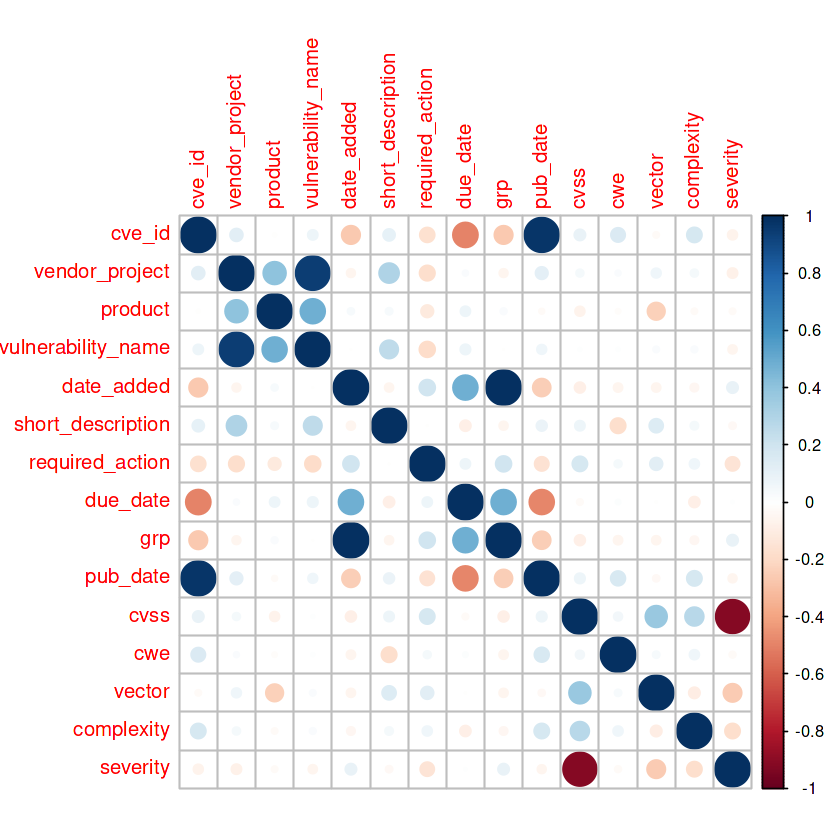

In [23]:
correlation_matrix2 <-  cor(all_num_clean)

corrplot(correlation_matrix2)

### EDA

* #### Analysis of Vulnerability Severity Levels

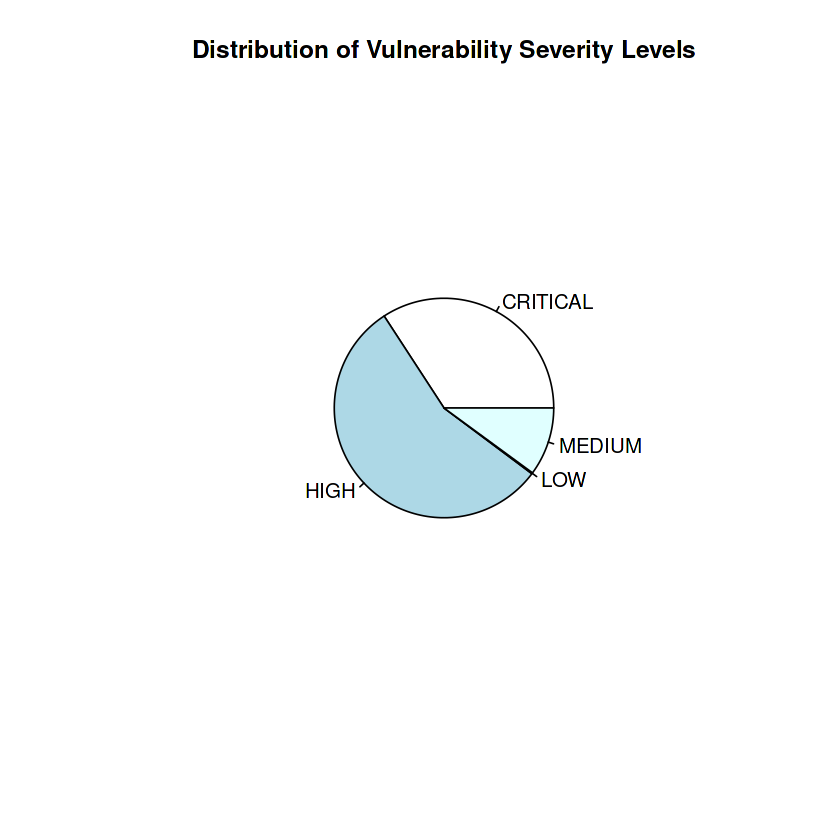

In [24]:
severity_counts <- table(all_imp$severity)

pie(severity_counts, labels = names(severity_counts), 
    main = "Distribution of Vulnerability Severity Levels")


* #### Vulnerability Trends over Time

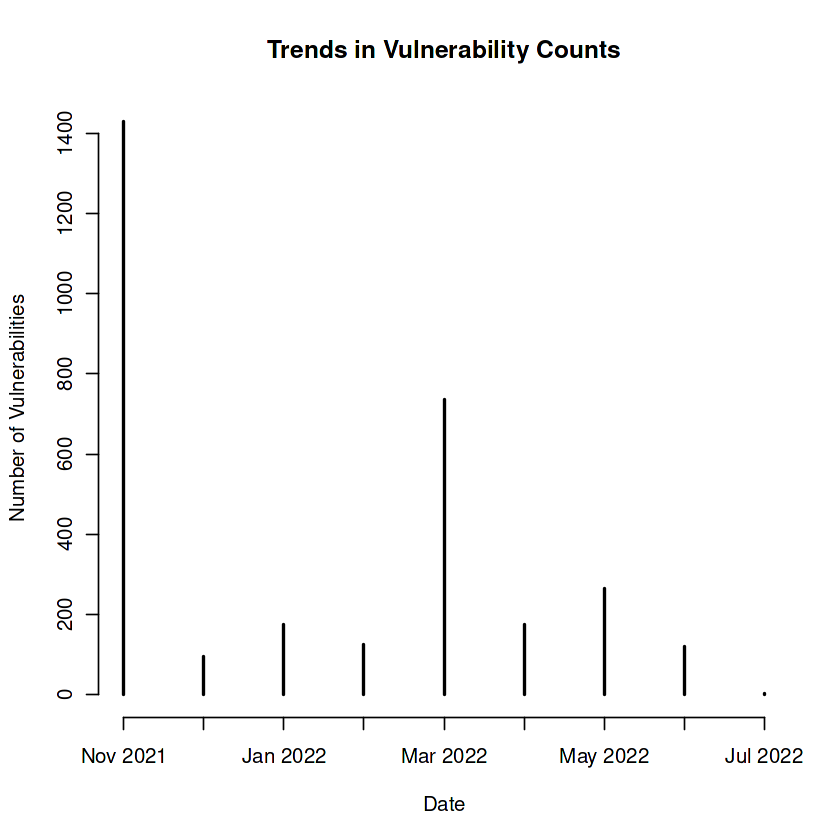

In [50]:
library(zoo)

# Convert date_azdded column to year-month format
all_imp$date_added <- as.yearmon(all_imp$date_added)

vuln_counts <- table(all_imp$date_added)

plot(vuln_counts, xlab = "Date", ylab = "Number of Vulnerabilities",
     main = "Trends in Vulnerability Counts")

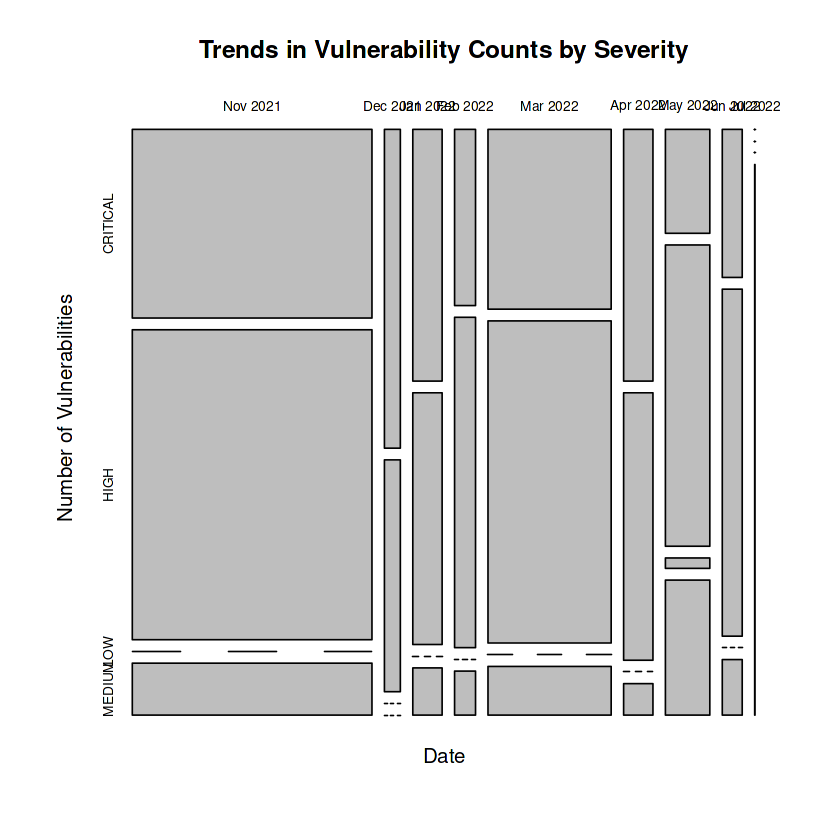

In [26]:
severity_counts <- table(all_imp$date_added, all_imp$severity)

plot(severity_counts, xlab = "Date", ylab = "Number of Vulnerabilities",
     main = "Trends in Vulnerability Counts by Severity")

* #### Proportion of Vulnerabilities with Due Dates Met

In [27]:
# Calculate the proportion of vulnerabilities with due dates met
proportion_due_dates_met <- sum(!is.na(all_imp$due_date)) / nrow(all_imp) * 100

print(paste("Proportion of vulnerabilities with due dates met:", proportion_due_dates_met, "%"))

[1] "Proportion of vulnerabilities with due dates met: 100 %"


* #### Distribution of Vulnerabilities by Vector

vector           count
1 ADJACENT_NETWORK   50 
2 LOCAL             791 
3 NETWORK          2280

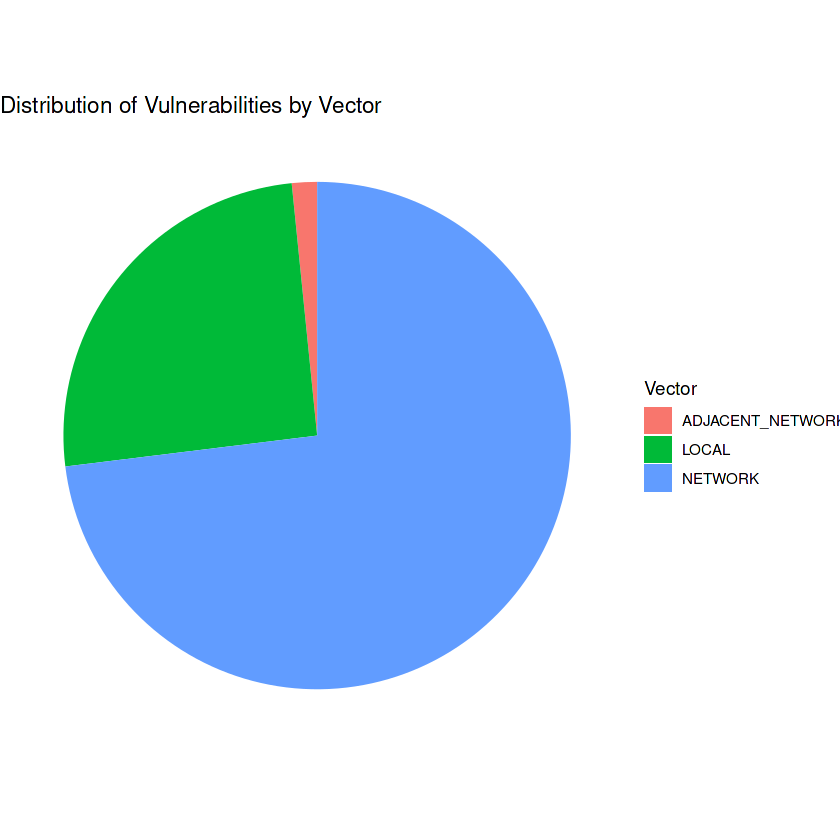

In [28]:
vulnerabilities_by_vector <- all_imp %>%
  group_by(vector) %>%
  summarise(count = n()) %>% 
  drop_na()

vulnerabilities_by_vector

chart_vector <- ggplot(vulnerabilities_by_vector, aes(x = "", y = count, fill = vector)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(fill = "Vector", title = "Distribution of Vulnerabilities by Vector") +
  theme_void()

chart_vector

* #### Distribution of Vulnerabilities by Complexity Level


HIGH  LOW 
 282 2839 

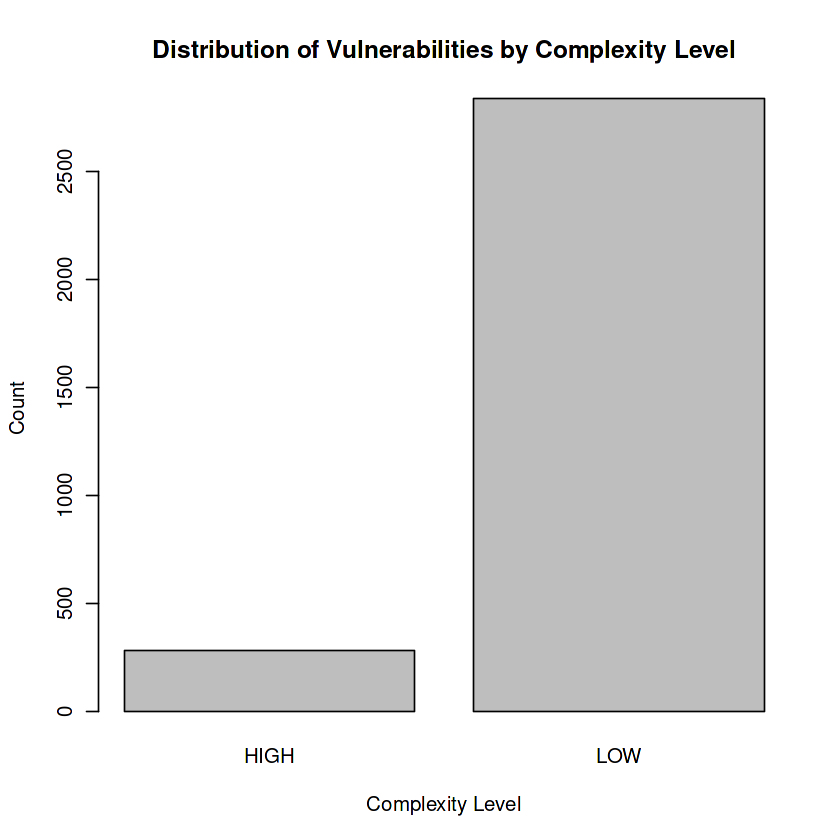

In [29]:
complexity_counts <- table(all_imp$complexity)
complexity_counts

barplot(complexity_counts, main = "Distribution of Vulnerabilities by Complexity Level", xlab = "Complexity Level", ylab = "Count")

* #### Top Vendors with the Highest Number of Vulnerabilities

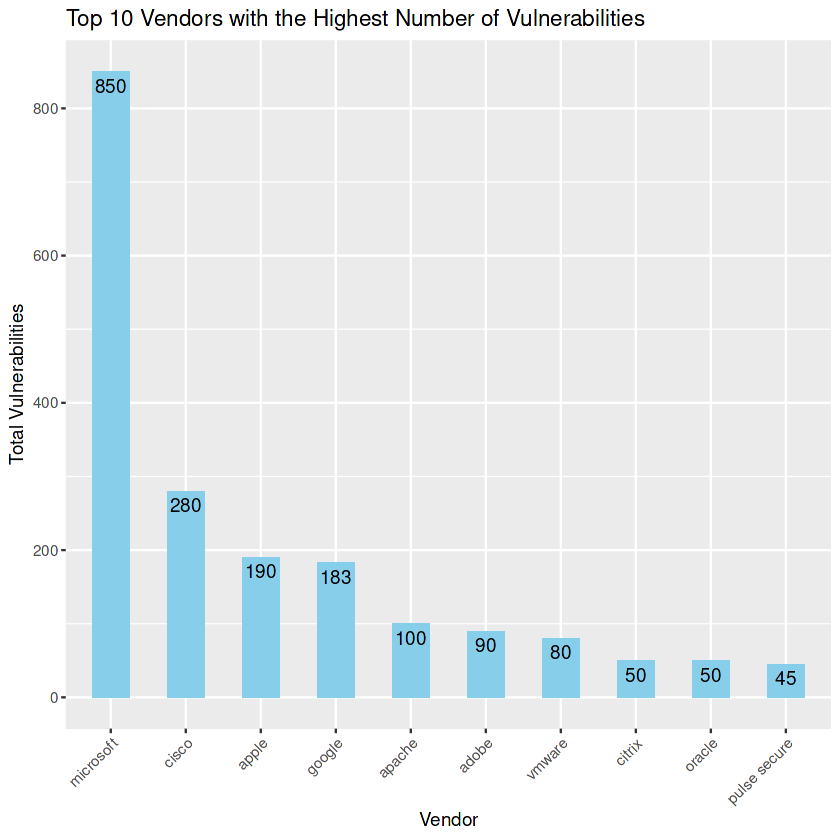

In [30]:
top_vendors <- all_imp %>%
  group_by(vendor_project) %>%
  summarize(total_vulnerabilities = n()) %>%
  arrange(desc(total_vulnerabilities)) %>%
  head(10)

top_vendors_chart <- ggplot(top_vendors, aes(x = reorder(vendor_project, -total_vulnerabilities), y = total_vulnerabilities)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.5) +
  geom_text(aes(label = total_vulnerabilities), hjust = 0.5, vjust = 1.5) +
  labs(title = "Top 10 Vendors with the Highest Number of Vulnerabilities",
       x = "Vendor",
       y = "Total Vulnerabilities") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

top_vendors_chart

* #### Top Products with the Highest Number of Vulnerabilities

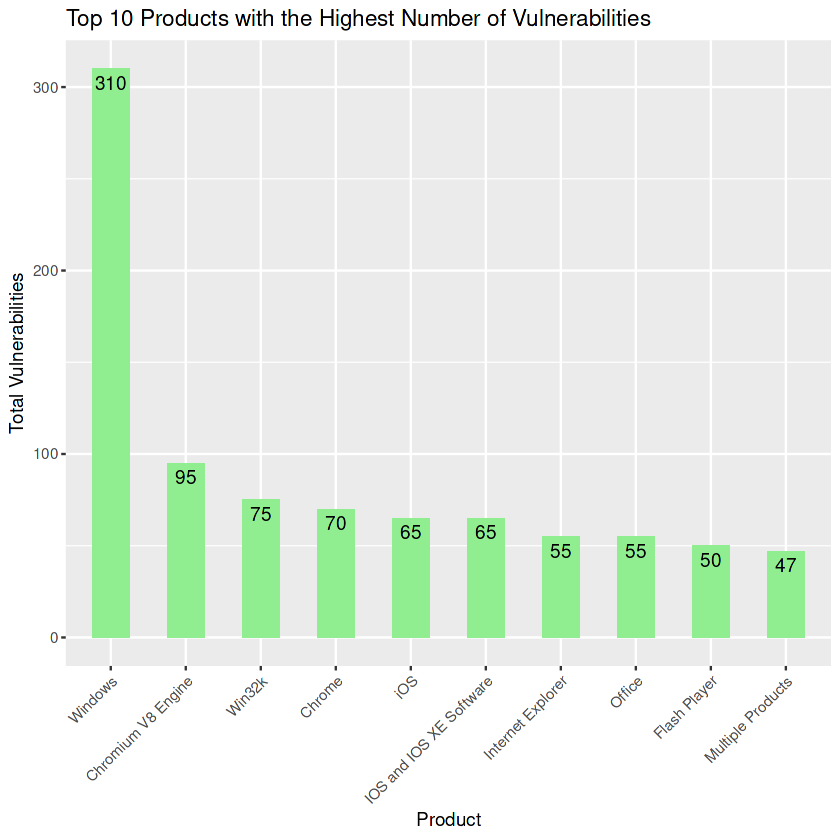

In [31]:
top_products <- all_imp %>%
  group_by(product) %>%
  summarize(total_vulnerabilities = n()) %>%
  arrange(desc(total_vulnerabilities)) %>%
  head(10)


# Bar chart for top products
top_products_chart <- ggplot(top_products, aes(x = reorder(product, -total_vulnerabilities), y = total_vulnerabilities)) +
  geom_bar(stat = "identity", fill = "lightgreen", width = 0.5) +
  geom_text(aes(label = total_vulnerabilities), hjust = 0.5, vjust = 1.5) +
  labs(title = "Top 10 Products with the Highest Number of Vulnerabilities",
       x = "Product",
       y = "Total Vulnerabilities") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

top_products_chart

* #### Most Common CWE Categories among Vulnerabilities

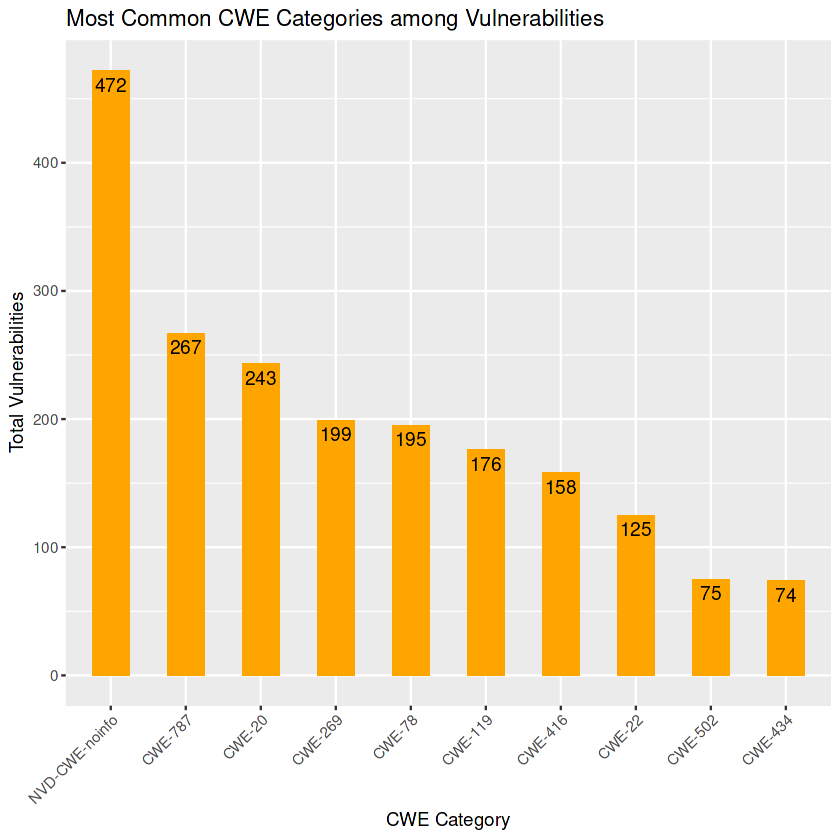

In [32]:
common_cwe <- all_imp %>%
  group_by(cwe) %>%
  summarize(total_vulnerabilities = n()) %>%
  arrange(desc(total_vulnerabilities)) %>% 
  head(10)

# Bar chart for common CWE categories
common_cwe_chart <- ggplot(common_cwe, aes(x = reorder(cwe, -total_vulnerabilities), y = total_vulnerabilities)) +
  geom_bar(stat = "identity", fill = "orange", width = 0.5) +
  geom_text(aes(label = total_vulnerabilities), hjust = 0.5, vjust = 1.5) +
  labs(title = "Most Common CWE Categories among Vulnerabilities",
       x = "CWE Category",
       y = "Total Vulnerabilities") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

common_cwe_chart

* #### Analysis on Patching Speed

In [33]:
all_imp$patching_time <- all_imp$due_date - all_imp$pub_date

all_imp$patching_time <- as.numeric(all_imp$patching_time)

summary(all_imp$patching_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -44.0   215.0   796.0   885.8  1445.0  2970.0 

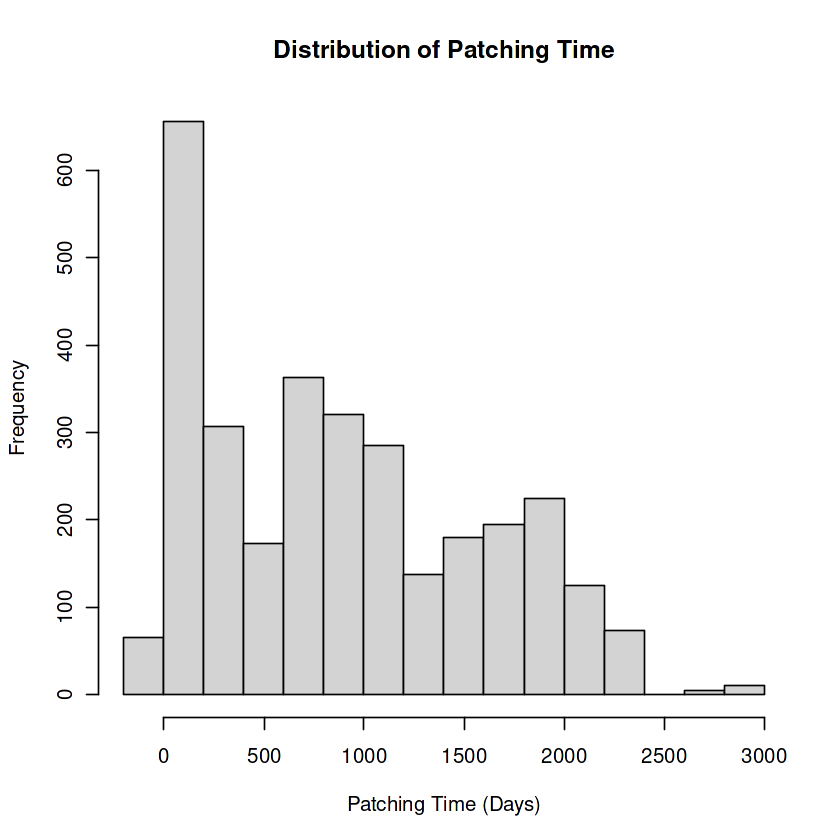

In [34]:
hist(all_imp$patching_time, breaks = 20, xlab = "Patching Time (Days)", main = "Distribution of Patching Time")

* #### Severity vs Patching Time

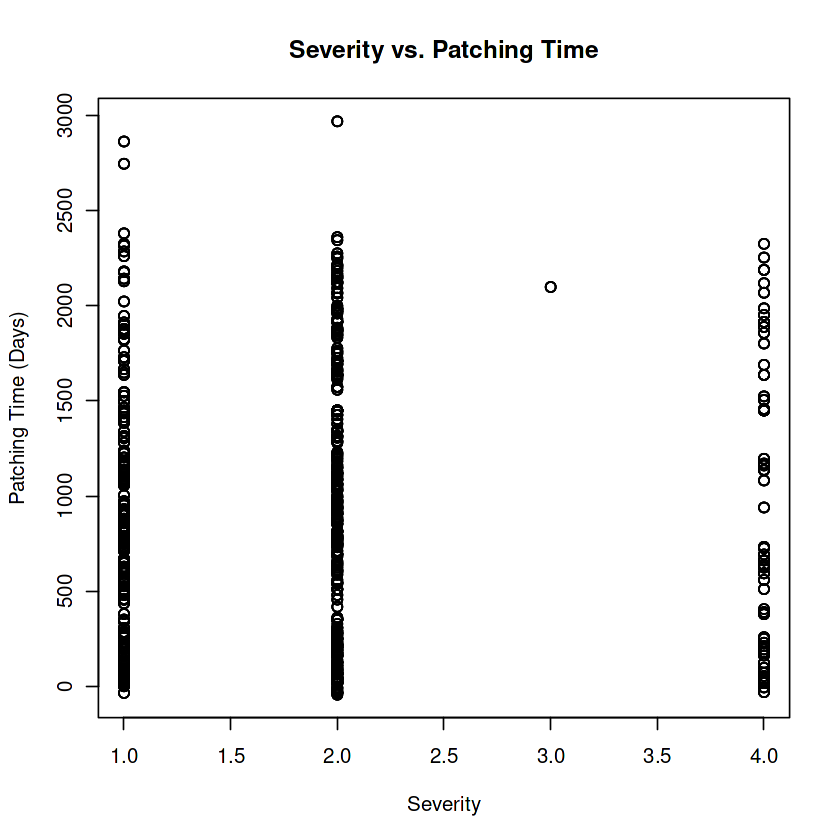

In [35]:
plot(all_num_clean$severity, all_imp$patching_time, xlab = "Severity", ylab = "Patching Time (Days)", main = "Severity vs. Patching Time")

In [36]:
cor(all_num_clean$severity, all_imp$patching_time)

[1] 0.06440336

#### Summary of the Section

We gained valuable insights into the distribution of vulnerabilities, severity levels, patching speed, and trends over time in this section. 

Distribution of vulnerabilities by product revealed that Windows was the most affected product, with a total of 310 vulnerabilities reported. This was followed by the Chromium V8 Engine with 95 vulnerabilities, Win32k with 75 vulnerabilities, Chrome with 70 vulnerabilities, and iOS and IOS XE Software with 65 vulnerabilities. These findings highlight the importance of prioritizing security measures for these widely used products.

Analyzing the severity levels of vulnerabilities, large proportion of the vulnerabilities were classified as high severity, emphasizing the critical nature of these threats. Additionally, more than 25% of the vulnerabilities were rated as critical, indicating their potential for significant harm. Around 15% fell into the medium severity category, while the remaining vulnerabilities were classified as low severity.

Examining the proportion of vulnerabilities with due dates met, we see that an impressive 100% of the vulnerabilities had their due dates met. This suggests a high level of responsiveness and efficiency in addressing and patching these vulnerabilities, contributing to improved security measures.

When considering the distribution of vulnerabilities by vector, we observed that the majority of vulnerabilities (2280) were associated with network vectors, followed by 791 vulnerabilities categorized as local vectors. There were also 50 vulnerabilities identified with adjacent network vectors. These findings underscore the significance of securing both network and local environments to mitigate potential risks.

Analyzing vulnerabilities by complexity level revealed that there were slightly more low complexity vulnerabilities (2839) compared to high complexity vulnerabilities (282). This implies that a significant number of vulnerabilities could potentially be exploited with relative ease, requiring proactive security measures to minimize the associated risks.

Identifying the top vendors with the highest number of vulnerabilities, we see that Microsoft topped the list with 850 vulnerabilities, followed by Cisco with 280 vulnerabilities, Apple with 190 vulnerabilities, Google with 183 vulnerabilities, Apache with 100 vulnerabilities, Adobe with 90 vulnerabilities, and VMware with 80 vulnerabilities. These insights can assist in prioritizing security efforts and collaborations with these vendors to address vulnerabilities effectively.

Assessing patching speed, we found that the minimum patching time was -44 days (indicating pre-patching) and the maximum was 2970 days. The median patching time was 796 days, with an average of 885.8 days. These statistics highlight the importance of timely and efficient patching to minimize the window of vulnerability and potential exploitation.

Examining the correlation between severity and patching time, we found a weak positive correlation (correlation coefficient = 0.064), suggesting that vulnerabilities with higher severity did not necessarily result in faster patching times. This finding underscores the need for prioritization and efficient response

### Network Analysis

* #### Network structure of the relationships between vendors and products

we performed a network analysis to explore the relationships between vendors and products. The network was visualized as a circle of nodes, where each node represents a vendor or a product.

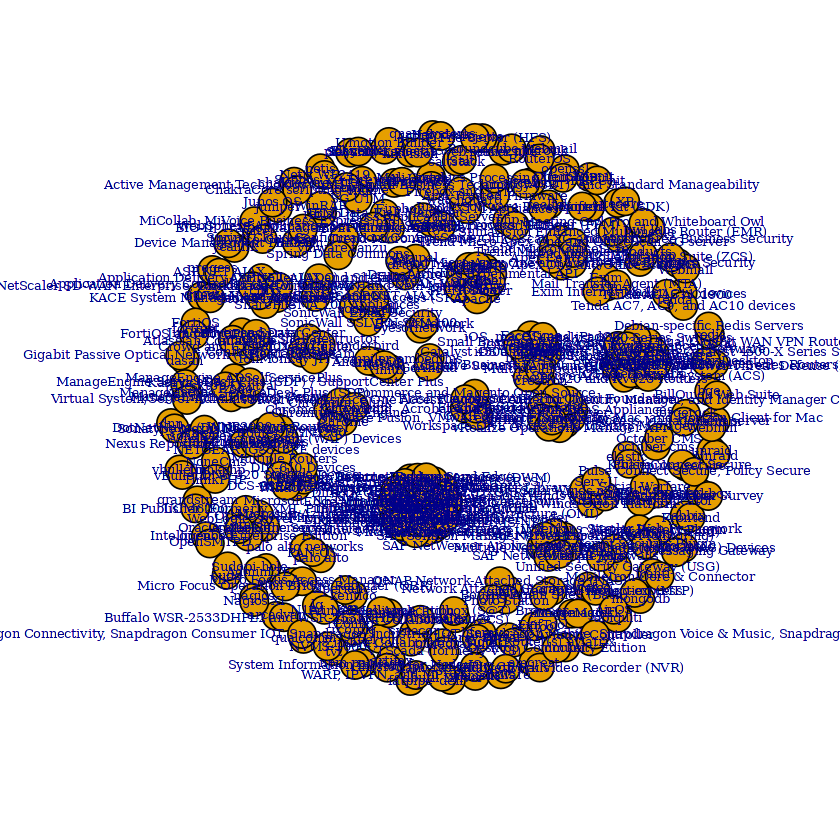

In [51]:
library(igraph)

# Create an edge list
edges <- data.frame(source = all_imp$vendor_project, target = all_imp$product)

# Remove missing values or empty strings
edges <- na.omit(edges)
edges <- edges[edges$source != "", ]
edges <- edges[edges$target != "", ]

# Create a graph object
g <- graph_from_data_frame(edges, directed = FALSE)

# Calculate degree centrality
centrality <- degree(g)

# Get the nodes with the highest degree centrality
most_central <- names(centrality)[centrality == max(centrality)]

plot(g, vertex.size = 10, vertex.label.cex = 0.6, edge.arrow.size = 0.5, edge.width = 0.5)

Chart looks very crowded because of the names but bear with me. 

There is a clustering of nodes at the lower part inside the circle, as well as at the top edge, indicating product - vendor relationships. 

In [38]:
library(networkD3)

nd <- igraph_to_networkD3(g)

# Create a Group column and assign a default value
nd$nodes$Group <- 1

# Create an interactive plot
forceNetwork(Links = nd$links, Nodes = nd$nodes, Source = "source", Target = "target",
             NodeID = "name", Group = "Group", width = 800, height = 600,
             opacity = 0.8, linkDistance = 100,
             bounded = TRUE, linkColour = "#999999", 
             colourScale = JS("d3.scaleOrdinal().range(['#66CCFF'])"),
             legend = TRUE)

HTML widgets cannot be represented in plain text (need html)

Here is the animated and interactive versison of the same chart using networkD3 library. This plot requires some GPU power but it shows a better and more understandable relationship between vendors and products

* #### Most Central Vendors in the Vulnerability Network

In [39]:
graph <- graph.data.frame(all_imp, directed = FALSE)

degree_centrality <- degree(graph, mode = "all")

sorted_degree_centrality <- sort(degree_centrality, decreasing = TRUE)

top_vendors <- names(sorted_degree_centrality)[1:10]
top_vendors

[1] "microsoft"    "cisco"        "apple"        "google"       "apache"      
 [6] "adobe"        "vmware"       "citrix"       "oracle"       "pulse secure"

The most central entities:

* Microsoft - Cisco - Apple - Google - Apache - Adobe - VMware - Citrix - Oracle - Pulse Secure

These entities exhibited a high degree of centrality, indicating that they had a significant number of vulnerabilities associated with them. This suggests that these vendors and products are potentially more prone to cybersecurity risks and require careful attention and proactive security measures.

It is interesting to note that these central entities encompass a wide range of industries, including software, technology, and networking. This highlights the pervasive nature of cybersecurity vulnerabilities across different sectors and emphasizes the need for comprehensive security measures across the board.

* #### Most Central Products in the Vulnerability Network

Warning message:
“ggrepel: 106 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


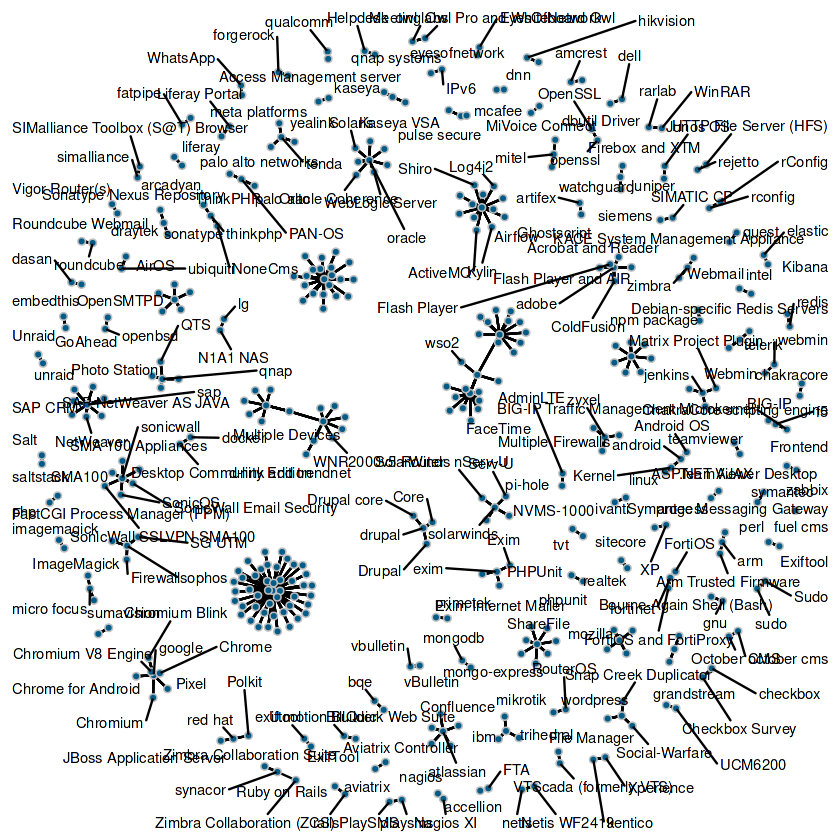

In [52]:
library(ggrepel)
library(ggraph)

network_data <- all_imp[, c("vendor_project", "product")]

# Create edge list
edge_list <- as.matrix(network_data)

graph <- graph_from_edgelist(edge_list, directed = FALSE)

# Create layout using Fruchterman-Reingold algorithm
layout <- layout_with_fr(graph)

# Convert graph layout to data frame
layout_df <- data.frame(layout)

# Add vendor/product names to layout data frame
layout_df$names <- V(graph)$name

graph_plot <- ggraph(graph, layout = "fr") +
geom_edge_link() +
geom_node_point(shape = 21, fill = "#005c87", color = "gray") +
geom_node_text(aes(label = name), repel = TRUE, box.padding = 0.5, size = 3, max.overlaps = 20) +
theme_void()


# Alternative with all texts displayed but there are a lot of overlaps
# graph_plot <- ggraph(graph, layout = "fr") +
#    geom_edge_link() +
#    geom_node_point(shape = 21, fill = "skyblue", color = "black") +
#    geom_node_text(aes(label = name), repel = TRUE, box.padding = 0.5, size = 3, max.overlaps = 1000) +
#    theme_void()

graph_plot

Looking at the resulting chart, we observe nodes with branches connecting them. Some nodes have a few branches, while others form clusters branching out to another cluster. There is a significant cluster of nodes, indicating a group of products that are closely interconnected.

* #### Are there Vendors/Products that are Highly Interconnected with other Vendors/Products, Indicating a Higher Level of Vulnerability?

In this section, we aim to explore the interconnectedness of vendors and products within the dataset. This analysis can provide insights into the level of vulnerability associated with certain vendors or products, as highly interconnected nodes may indicate a higher risk of cybersecurity issues.

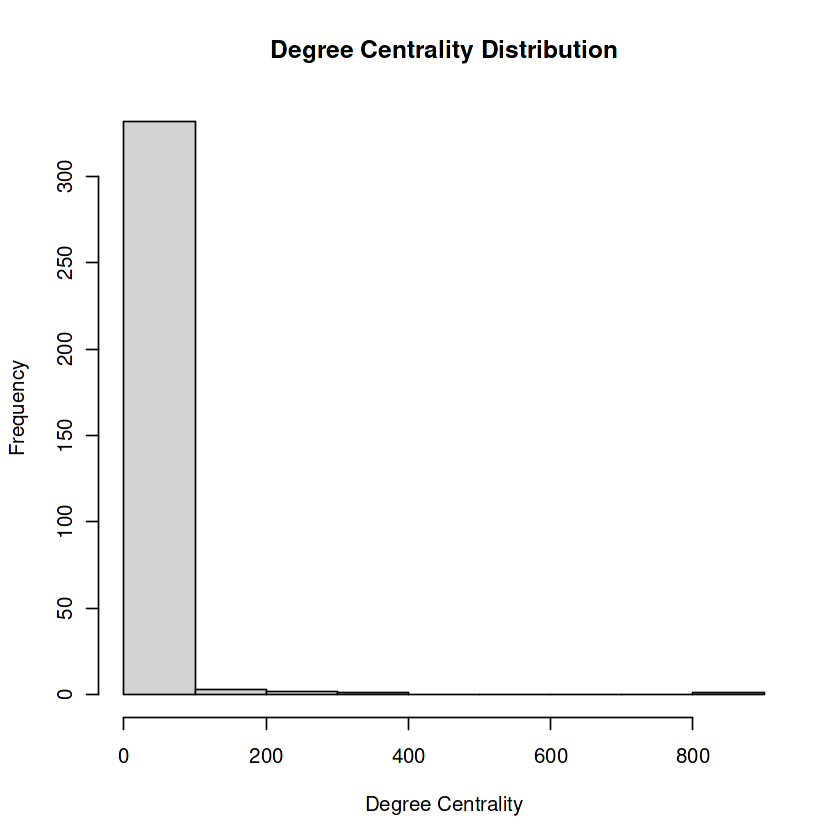

In [41]:
g2 <- graph(edges = numeric(0))

for (i in 1:nrow(all_num_clean)) {
  vendor <- all_num_clean$vendor_project[i]
  product <- all_num_clean$product[i]
  
  # Add the vendor and product as vertices if they don't already exist
  if (!(vendor %in% V(g2))) {
    g2 <- add_vertices(g2, vendor)
  }
  if (!(product %in% V(g2))) {
    g2 <- add_vertices(g2, product)
  }
  
  g2 <- add_edges(g2, c(vendor, product))
}


degree_centrality2 <- degree(g2)

hist(degree_centrality2, main = "Degree Centrality Distribution", xlab = "Degree Centrality")

In [42]:
graph <- graph.empty(directed = FALSE)

nodes <- unique(c(all_imp$vendor_project, all_imp$product))
graph <- add.vertices(graph, length(nodes), name = nodes)

edges <- cbind(all_imp$vendor_project, all_imp$product)
graph <- add.edges(graph, edges)

degree_centrality <- degree(graph)

top_interconnected <- names(degree_centrality)[degree_centrality == max(degree_centrality)]

top_interconnected

[1] "microsoft"

Microsoft has the most interconnectedness with other products and vendors.

In [43]:
install.packages("visNetwork")
library(visNetwork)

# Create a data frame of nodes
nodes <- data.frame(id = unique(c(all_imp$vendor_project, all_imp$product)), 
                    label = unique(c(all_imp$vendor_project, all_imp$product)))

# Create a data frame of edges
edges <- data.frame(from = all_imp$vendor_project, to = all_imp$product)

# Create the visNetwork object with nodes and edges data
network <- visNetwork(nodes, edges)

# Set the network options
network <- visOptions(network, width = "100%", height = "500px")
network <- visInteraction(network, hover = TRUE, hoverConnectedEdges = TRUE)
network <- visPhysics(network, enabled = TRUE)

network

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



HTML widgets cannot be represented in plain text (need html)

Using the visNetwork() function, we create a visNetwork object, passing in the nodes and edges data frames. We can then customize the appearance and behavior of the network using various visOptions such as width, height, hover, and physics.

Finally, we display the interactive chart using the visIgraph() function, which renders the network visualization in the notebook.

You can zoom in to see which node represents which object.

**Outcome**

The network analysis reveals the interconnectedness of vendors and products within the dataset. By examining the nodes with the highest degree centrality, we can identify vendors or products that have a higher level of vulnerability due to their extensive connections with other nodes. The interactive chart allows for further exploration of the network structure and relationships between vendors and products.

When we visualize the network using the interactive chart, we can observe clusters and cliques of nodes connecting with each other. These clusters represent groups of vendors and products that have a higher level of interconnectedness among themselves. Nodes within the same cluster are more likely to have direct connections or dependencies on each other.

Now, regarding the observation of some clusters being in motion while others remain static, it is important to note that the visualization captures the dynamic nature of the network. The movements of the nodes in the chart are visual representations of the relationships between the nodes.

The motion of clusters in the chart indicates that there are dynamic relationships or interactions among the nodes within those clusters. It suggests that the vendors and products within those clusters are actively connected, collaborating, or dependent on each other. This dynamic nature can be due to various factors such as shared vulnerabilities, common dependencies, or ongoing collaborations.

On the other hand, the static clusters indicate a relatively stable or less dynamic relationship among the nodes within those clusters. It means that the vendors and products in those clusters may have fewer connections or dependencies with each other. This does not necessarily imply that they are less important or less vulnerable, but rather that their connections within the network are relatively stable or less active.

By observing the motion and static nature of the clusters, we gain insights into the varying levels of interconnectedness and dynamics present in the network. This information can help in understanding the overall structure and relationships within the network of cybersecurity risks, and potentially identify areas that require closer attention or further analysis.

This network analysis provides valuable insights into the interconnected nature of vendors and products, highlighting potential areas of vulnerability and indicating which entities may have a greater impact on the overall network.

### Clustering Analysis



#### Choosing the number of Clusters

* #### Elbow Method

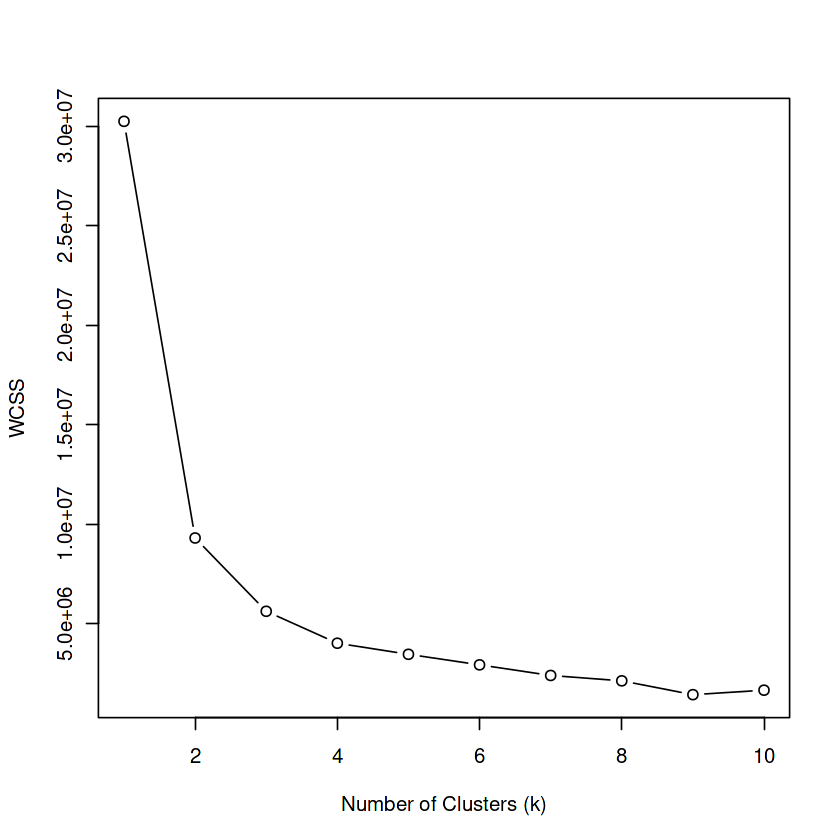

In [71]:
# Perform k-means clustering
library(cluster)

cluster_data <- all_num_clean[, c("vendor_project", "product")]

# Initialize empty vectors to store the WCSS values
wcss_values <- vector()

# Calculate WCSS for different values of k
for (k in 1:10) {
  kmeans_model <- kmeans(cluster_data, centers = k)
  wcss_values[k] <- kmeans_model$tot.withinss
}

# Plot the WCSS values against the number of clusters
plot(1:10, wcss_values, type = "b", xlab = "Number of Clusters (k)", ylab = "WCSS")

* #### Silhoulette Method

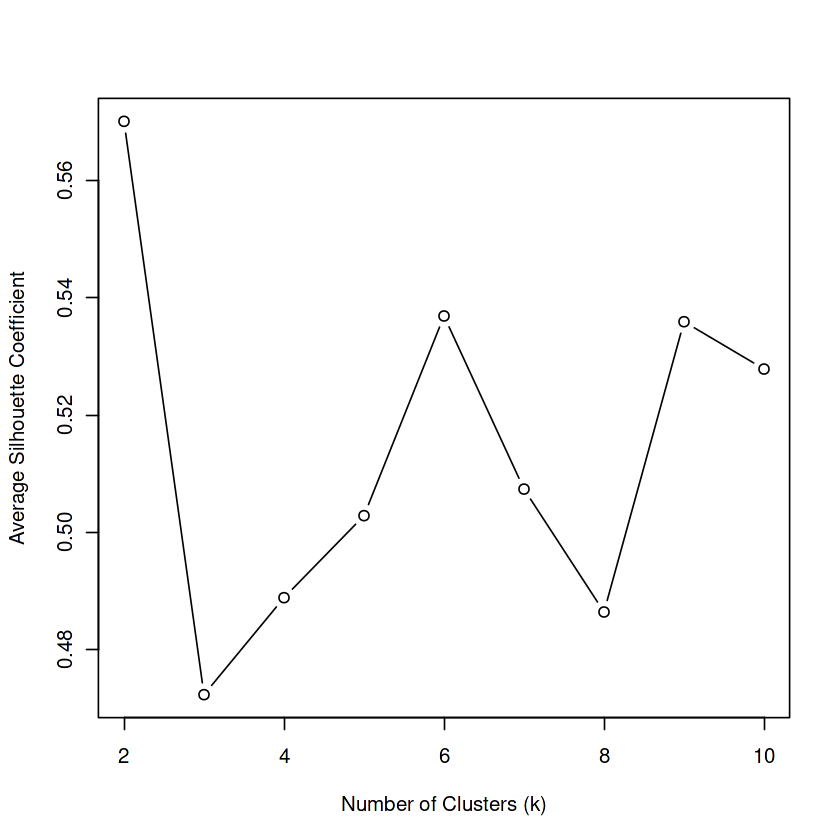

In [72]:
# Calculate average silhouette coefficient for different values of k
silhouette_values <- list()

for (k in 2:10) {
  kmeans_model <- kmeans(cluster_data, centers = k)
  silhouette_obj <- silhouette(kmeans_model$cluster, dist(cluster_data))
  silhouette_values[[k]] <- mean(silhouette_obj[, 3])
}

# Plot the average silhouette coefficients against the number of clusters
plot(2:10, unlist(silhouette_values), type = "b", xlab = "Number of Clusters (k)", ylab = "Average Silhouette Coefficient")

**Output** 

Elbow Method provides a clearer indication for choosing the number of clusters compared to the Silhouette Method. The Elbow Method shows a significant decline in the WCSS from k=1 to k=2, and the decrease continues as the number of clusters increases. This pattern suggests that adding more clusters beyond k=2 does not result in a substantial improvement in clustering quality.

On the other hand, the Silhouette Method shows relatively high silhouette coefficients across different values of k, including k=2, k=3, and k=4. This indicates that there is reasonable clustering structure present in the data for these values.

So i choose to go with 3.

* #### Clusters/Communities of Vendors/Products that Share a High Number of Vulnerabilities

In this section, we performed a clustering analysis to identify clusters or communities of vendors and products that share a high number of vulnerabilities.

To begin the analysis, we selected the relevant columns from our dataset, namely "vendor_project" and "product," which represent the vendors and products associated with each vulnerability. Then applied the k-means clustering algorithm to these data points.

In our analysis, we chose to divide the data into three clusters (k = 3).

cluster_assignments
   1    2    3 
 833 1228 1060 

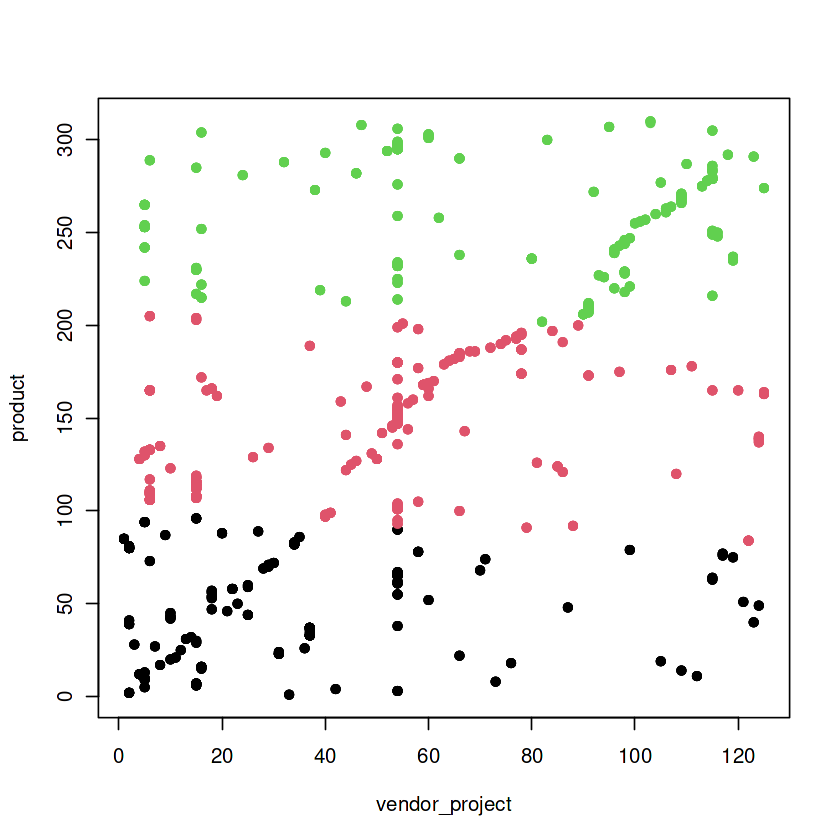

In [76]:
# Perform k-means clustering
library(cluster)

cluster_data <- all_num_clean[, c("vendor_project", "product")]

k <- 3  # Number of clusters
kmeans_model <- kmeans(cluster_data, centers = k)

cluster_assignments <- kmeans_model$cluster

cluster_counts <- table(cluster_assignments)
cluster_counts

plot(cluster_data, col = cluster_assignments, pch = 16)

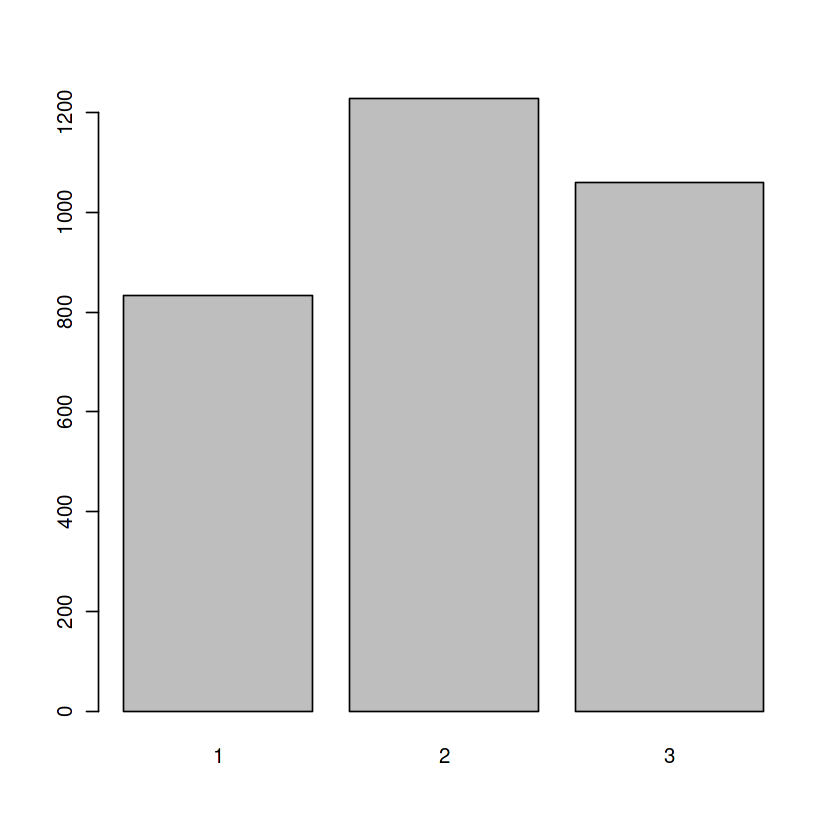

In [77]:
barplot(cluster_counts)

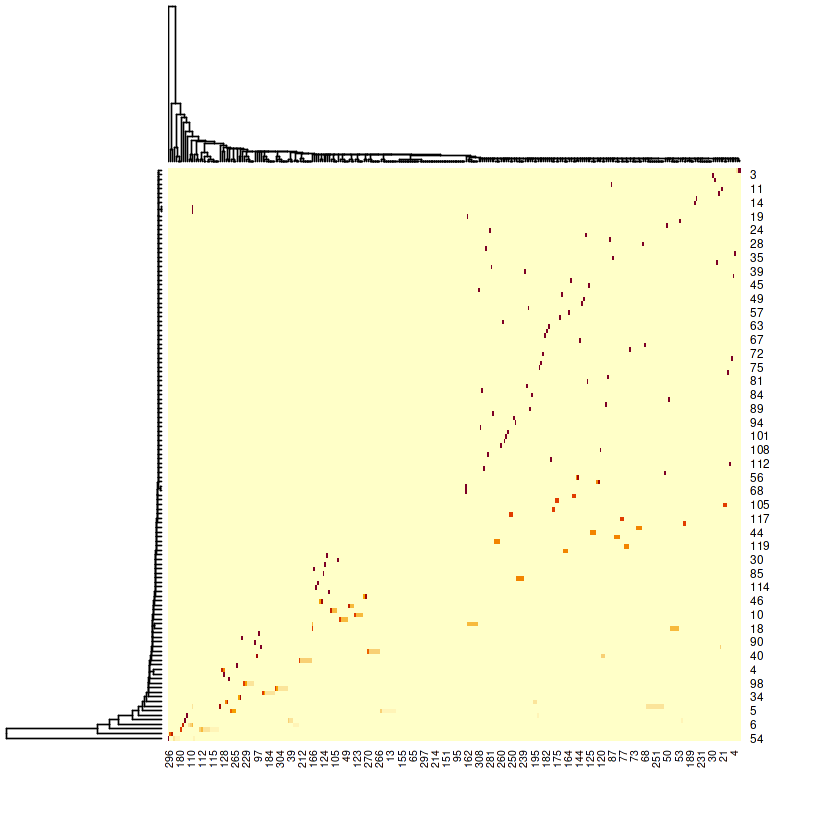

In [78]:
heatmap(table(cluster_data$vendor_project, cluster_data$product))

* Vendors and products with a higher frequency of vulnerabilities are represented by darker shades or higher cell values.
* Clusters of vendors and products that share a significant number of vulnerabilities appear as contiguous blocks of dark cells.
* Certain vendors or products might exhibit a higher vulnerability rate across multiple clusters, indicating their association with different types of vulnerabilities.

* #### Vendor Collaboration: Which vendors have collaborated on multiple projects or products? Are there any patterns or clusters of vendors working together?

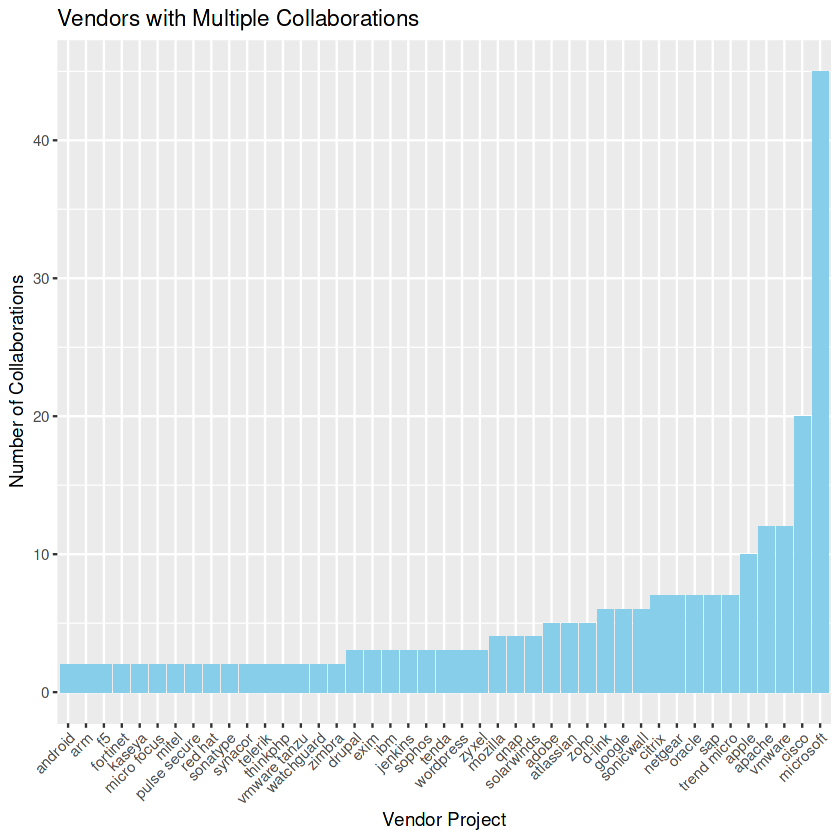

In [79]:
vendor_collaboration <- all_imp %>%
  group_by(vendor_project) %>%
  summarise(collaborations = n_distinct(product)) %>%
  filter(collaborations > 1) %>%
  arrange(desc(collaborations))

ggplot(vendor_collaboration, aes(x = reorder(vendor_project, collaborations), y = collaborations)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(x = "Vendor Project", y = "Number of Collaborations") +
  ggtitle("Vendors with Multiple Collaborations") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

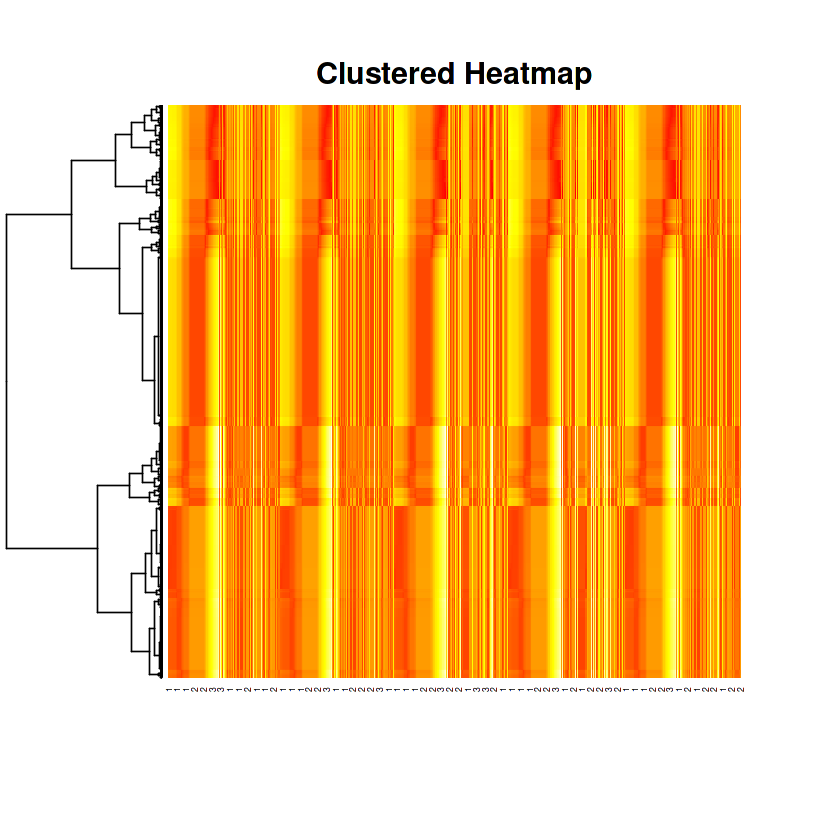

In [86]:
# Compute distance matrix
dist_matrix <- dist(all_num_clean$vendor_project)

# Perform hierarchical clustering
hc <- hclust(dist_matrix)

# Cut the dendrogram to obtain clusters
clusters <- cutree(hc, k = 3) 

# Create a heatmap of the distance matrix with cluster assignments
heatmap(as.matrix(dist_matrix), Rowv = as.dendrogram(hc), Colv = NA, col = heat.colors(256),
        main = "Clustered Heatmap", labRow = "", labCol = clusters)

The hierarchical clustering and heatmap analysis help to identify clusters of vendor collaborations based on the similarity of their projects or products.

#### Vulnerability Networks: Identify Networks Or Clusters Of Vulnerabilities Based On Common Attributes

In [87]:
# Subset the data to include only the relevant columns
subset_df <- all_num_clean[, c("severity", "cwe", "vector")]

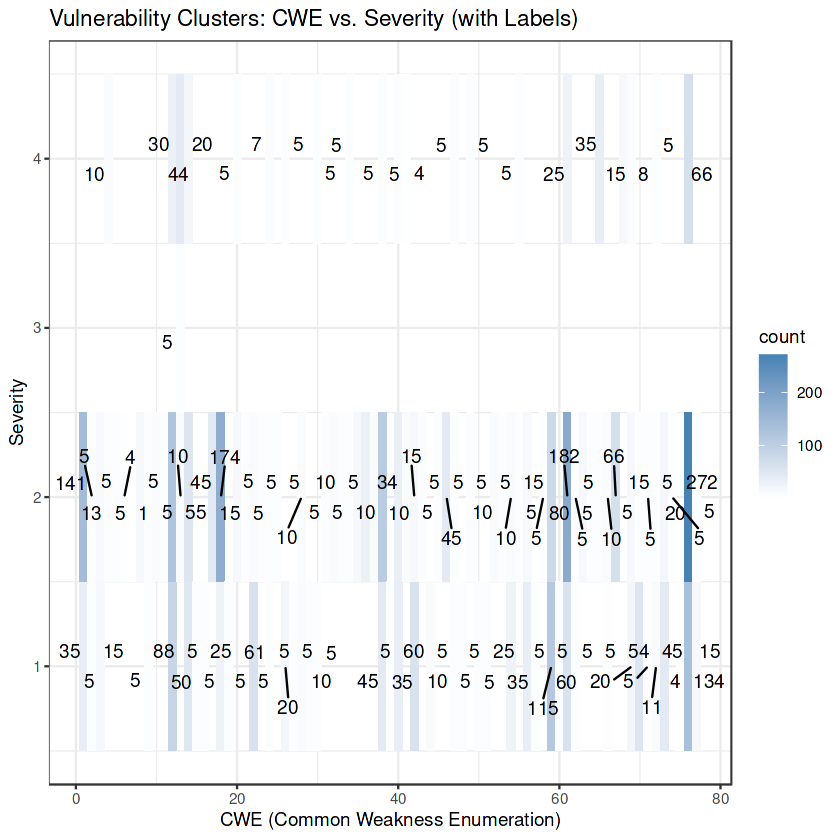

In [89]:
# CWE vs. Severity
cwe_severity_labels_plot <- subset_df %>%
  group_by(cwe, severity) %>%
  summarise(count = n(), .groups = 'drop') %>%
  ggplot(aes(x = cwe, y = severity, label = count, fill = count)) +
  geom_tile() +
  geom_text_repel() +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(x = "CWE (Common Weakness Enumeration)", y = "Severity") +
  ggtitle("Vulnerability Clusters: CWE vs. Severity (with Labels)") +
  theme_bw()

cwe_severity_labels_plot

There is a wide distribution of vulnerabilities across different CWE categories and severity levels.
Severity level 2 appears to be the most common severity level across various CWE categories.
Some CWE categories have vulnerabilities that span multiple severity levels, indicating a diverse range of risks associated with those weaknesses.
There are certain CWE categories where severity level 4 vulnerabilities are more prevalent, suggesting critical security risks in those specific areas.

In [96]:
vector_severity_labels_plot2 <- subset_df %>%
  group_by(vector, severity) %>%
  summarise(count = n(), .groups = 'drop')

vector_severity_labels_plot2

vector severity count
1 1      1           5 
2 1      2          20 
3 1      4          25 
4 2      2         731 
5 2      4          60 
6 3      1        1062 
7 3      2         984 
8 3      3           5 
9 3      4         229

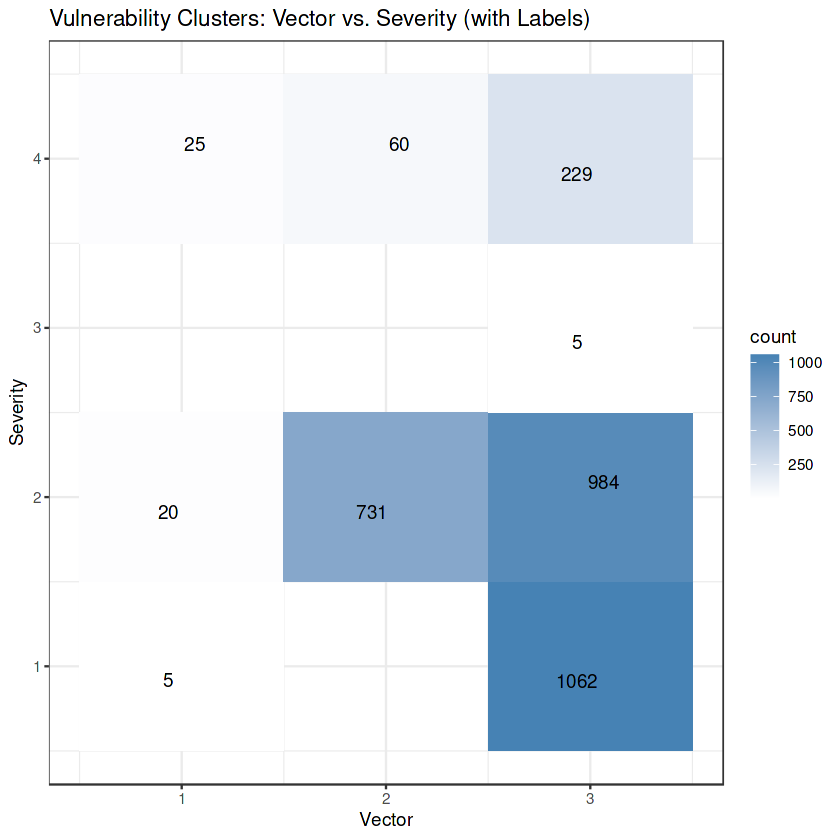

In [95]:
# Vector vs. Severity
vector_severity_labels_plot <- subset_df %>%
  group_by(vector, severity) %>%
  summarise(count = n(), .groups = 'drop') %>%
  ggplot(aes(x = vector, y = severity, label = count, fill = count)) +
  geom_tile() +
  geom_text_repel(max.overlaps = Inf) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(x = "Vector", y = "Severity") +
  ggtitle("Vulnerability Clusters: Vector vs. Severity (with Labels)") +
  theme_bw()

vector_severity_labels_plot

Vulnerability vector 1 is associated with severity levels 1, 2, and 4. It has a relatively low count for severity 1 and a higher count for severity 2 and 4.
Vulnerability vector 2 is primarily associated with severity 2, with a significantly high count.
Vulnerability vector 3 is associated with all severity levels, with a higher count for severity 1, 2, and 4.

These findings suggest that different vulnerability vectors may have varying impacts in terms of severity. Vulnerability vector 2 stands out as having a higher count of vulnerabilities at severity level 2, indicating a potentially widespread impact. On the other hand, vulnerability vector 1 shows a mix of vulnerabilities across severity levels, suggesting a diverse range of risks. Vector 3 has a very significant association with severity levels 1 and 2 also.


#### Are there any “super spreader” vulnerabilities that affect multiple vendors/products?

In [113]:
vulnerability_counts <- table(all_imp$vulnerability_name)

super_spreader_vulnerabilities <- names(vulnerability_counts[vulnerability_counts > 1])

super_spreader_data <- all_imp[all_imp$vulnerability_name %in% super_spreader_vulnerabilities, ]

super_spreader_counts <- table(super_spreader_data$vulnerability_name)

top_spreaders <- head(names(super_spreader_counts), 25)

top_spreader_data <- super_spreader_data[super_spreader_data$vulnerability_name %in% top_spreaders, ]

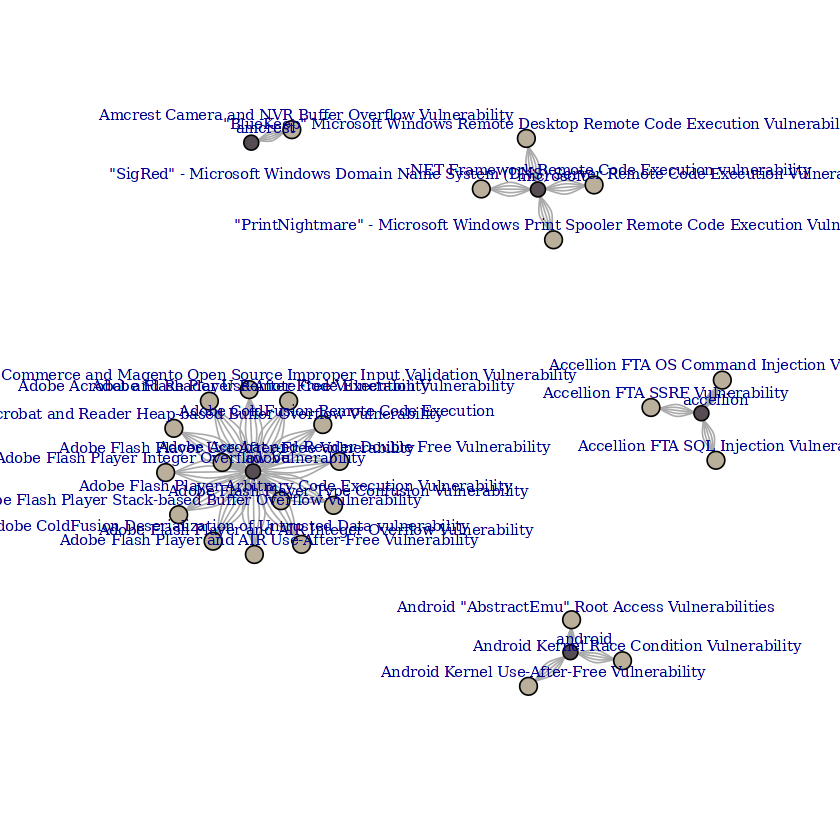

In [114]:
graph <- graph.data.frame(top_spreader_data[, c("vendor_project", "vulnerability_name")], directed = FALSE)

node_colors <- ifelse(V(graph)$name %in% top_spreader_data$vendor_project, "#564c53", "#baaf9b")
node_sizes <- ifelse(V(graph)$name %in% top_spreader_data$vulnerability_name, 6, 5)

layout <- layout_with_fr(graph)

plot(graph, vertex.color = node_colors, vertex.size = node_sizes, edge.arrow.size = 1.5, layout = layout, vertex.label.dist = 1, vertex.label.cex = 0.7)

#### Are There Any Vendors/products That Consistently Address Vulnerabilities Quickly, Reducing Their Impact On The Network?

In [135]:
filtered_df <- all_imp[!is.na(all_imp$due_date), ]

filtered_df$time_taken <- as.numeric(as.Date(filtered_df$due_date) - as.Date(filtered_df$date_added))

avg_time_taken <- aggregate(time_taken ~ vendor_project + product, filtered_df, FUN = mean)

sorted_avg_time_taken <- avg_time_taken[order(avg_time_taken$time_taken), ]

head(sorted_avg_time_taken, 5)

vendor_project product                            time_taken
304 microsoft      Windows CryptoAPI                  -642.00000
177 microsoft      Netlogon Remote Protocol (MS-NRPC) -406.00000
200 pulse secure   Pulse Connect Secure               -144.25000
155 microsoft      Microsoft Exchange Server           -42.44444
13  apache         Apache                               14.00000

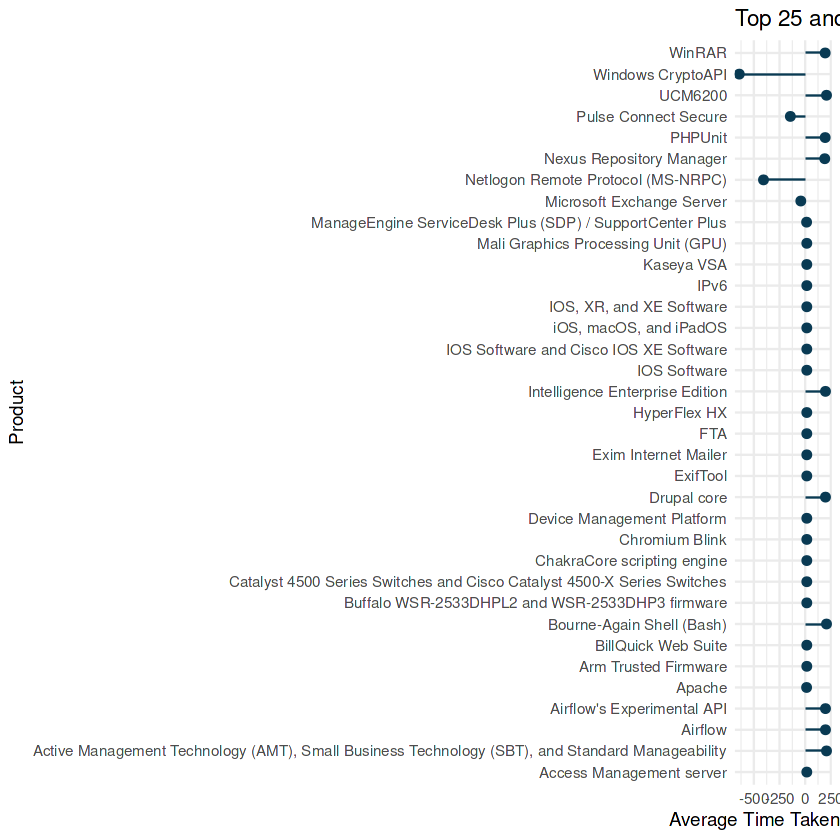

In [136]:
top_25 <- head(sorted_avg_time_taken, 25)
bottom_10 <- tail(sorted_avg_time_taken, 10)

combined_data <- rbind(top_25, bottom_10)

# lollipop chart
library(ggplot2)

ggplot(combined_data, aes(x = reorder(product, time_taken), y = time_taken)) +
  geom_segment(aes(x = product, xend = product, y = 0, yend = time_taken), color = "#093a53") +
  geom_point(color = "#093a53", size = 2) +
  coord_flip() +
  labs(x = "Product", y = "Average Time Taken (days)") +
  ggtitle("Top 25 and Bottom 10 Vendors/Products by Average Time Taken to Address Vulnerabilities") +
  theme_minimal()

Microsoft's "Windows CryptoAPI" and "Netlogon Remote Protocol (MS-NRPC)" demonstrate negative average time taken values. This anomaly might be due to erroneous or incomplete data.

Apache, Zoho's ManageEngine ServiceDesk Plus, Cisco's Catalyst 4500 Series Switches, and Google's Chromium Blink display efficient response times in addressing vulnerabilities, reducing the potential impact on network security.

On the other hand, the bottom 10 vendors/products exhibit longer average response times. Some examples include Sonatype's Nexus Repository Manager, PHPUnit, and WinRAR by Rarlab. These products/vendors might benefit from improving their vulnerability patching processes to reduce the window of potential exploitation.

The average time taken to address vulnerabilities does not necessarily indicate the severity of the vulnerabilities themselves. Some products may have more complex vulnerabilities to address, leading to longer response times.

### Bayesian Modeling

#### Classification

In this section, i performed Bayesian modeling and classification to predict the severity of cybersecurity vulnerabilities based on the available data. Used Naive Bayes classifier.

In [143]:
library(e1071)  # Naive Bayes classifier

set.seed(42)  # reproducibility
train_indices <- sample(1:nrow(all_imp), nrow(all_imp) * 0.8)  # 80% for training
train_data <- all_num_clean[train_indices, ]
test_data <- all_num_clean[-train_indices, ]

model <- naiveBayes(severity ~ ., data = train_data)

predictions <- predict(model, test_data)

accuracy <- sum(predictions == test_data$severity) / nrow(test_data)

accuracy

[1] 0.9104

#### Bayesian Network Analysis

In this section, i applied Bayesian network analysis to understand the relationships between different variables in our dataset. 

Bayesian networks provides insights into the conditional dependencies and relationships among the variables. By examining the structure and arcs of the network, we can identify the most influential variables and understand how changes in one variable may affect others. This information is valuable in understanding the interplay of different factors contributing to cybersecurity risks.

In [151]:
library(bnlearn)

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("Rgraphviz")

library(Rgraphviz)

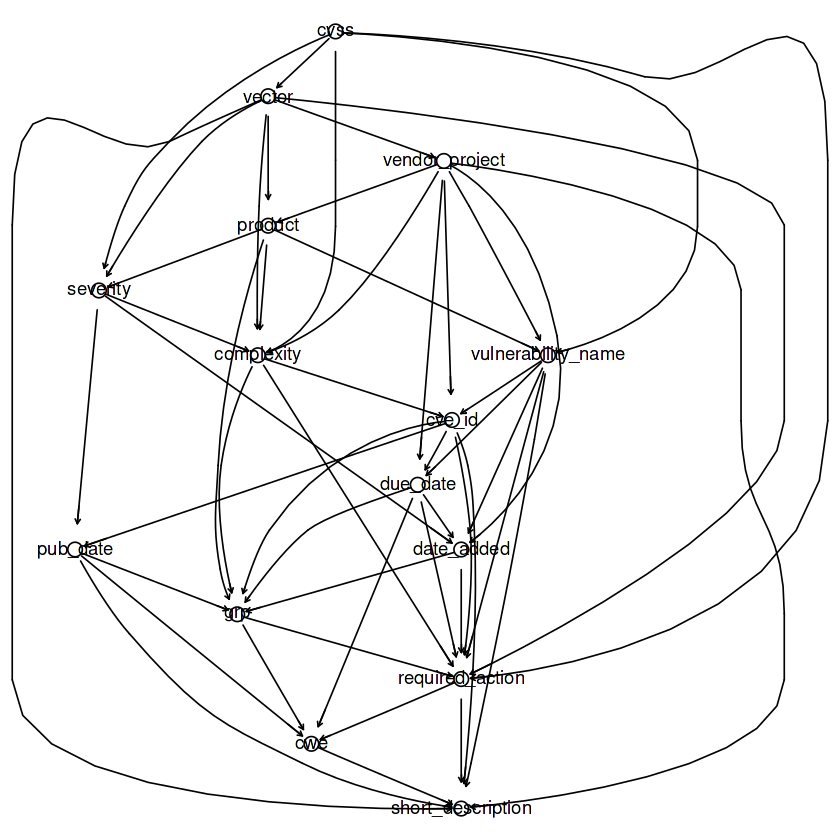

In [153]:
# Learn the structure of the Bayesian network using the dataset
bn <- hc(all_num_clean)

g <- Rgraphviz::layoutGraph(bnlearn::as.graphNEL(bn))
graph::nodeRenderInfo(g) <- list(fontsize=100)
Rgraphviz::renderGraph(g)

Graph shows the directed arcs representing the dependencies between the variables. Each node in the graph represents a variable, and the arrows indicate the direction of influence.